In [1]:
pip install catboost

     |████████████████████████████████| 76.4 MB 41 kB/s 


In [2]:
import platform

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
#from imblearn.over_sampling import SMOTE
#from tabulate import tabulate
import itertools
import seaborn as sns
from copy import copy
from sklearn.externals import joblib
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer, RobustScaler
import sklearn
from sklearn.externals import joblib
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Normalizer, FunctionTransformer
from sklearn.kernel_approximation import Nystroem
from sklearn.model_selection import train_test_split
#import sklearn.model_selection.StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, r2_score
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
# notice: installing imblearn might takes a few minutes
#!conda install -c anaconda imblearn -y

In [4]:
# notice: installing tabulate might takes a few minutes
#!conda install -c anaconda tabulate -y

### 1. The LoadData routiine is used to read dataset, and create training and testing datasets

In [5]:
def LoadData():
    global feature_names, response_name, n_features, model_full  
    model_full = pd.read_csv('https://raw.githubusercontent.com/Vinsocf/emotions/main/Wisconsin-bc-data.csv')
        
    # we change the class values (at the column number 2) from B to 0 and from M to 1
    model_full.iloc[:,1].replace('B', 0,inplace=True)
    model_full.iloc[:,1].replace('M', 1,inplace=True)
    response_name = ['diagnosis']
    drop_list = ['Unnamed: 32','id','diagnosis']
    model_full_x= model_full.drop(drop_list,axis = 1)
    X = model_full_x
    y = model_full.diagnosis
    
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size = 0.3,
                                                        random_state = 12345)
    return X_train, y_train, X_test, y_test

### Features selected from Part 2 

In [6]:
# 1. Feature selection with correlation (16)
fs_corr = ['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean','symmetry_mean',
                     'fractal_dimension_mean', 'texture_se', 'area_se','smoothness_se', 'concavity_se',
                     'symmetry_se', 'fractal_dimension_se','smoothness_worst', 'concavity_worst', 
                     'symmetry_worst', 'fractal_dimension_worst']
    
    # 2. Univariate feature selection SelectKBest, chi2
fs_chi2 = ['texture_mean', 'area_mean', 'concavity_mean', 'symmetry_mean', 'area_se', 
                     'concavity_se', 'smoothness_worst', 'concavity_worst', 'symmetry_worst', 
                     'fractal_dimension_worst']
    
    # 3. Recursive feature elimination (RFE) with random forest
fs_rfe = ['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'area_se', 
              'smoothness_se', 'concavity_se', 'smoothness_worst', 'concavity_worst', 'symmetry_worst']
    
    # 4. Recursive feature elimination with cross validation(RFECV) with random forest
fs_rfecv = ['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean','fractal_dimension_mean'
                , 'area_se', 'concavity_se', 'concavity_worst', 'symmetry_worst']
    
    # 5. Tree based feature selection with random forest classification
fs_rf = ['texture_mean', 'area_mean', 'concavity_mean', 'area_se', 'concavity_se', 
             'fractal_dimension_se', 'smoothness_worst','concavity_worst', 'symmetry_worst', 
             'fractal_dimension_worst']
    
    # 6. ExtraTree based feature selection 
fs_extraTree = ['texture_mean', 'area_mean', 'concavity_mean', 'fractal_dimension_mean', 'area_se', 
                    'concavity_se','smoothness_worst', 'concavity_worst', 
                    'symmetry_worst','fractal_dimension_worst']
    
    # 7. L1 feature selection (LinearSVC)
fs_l1 = ['texture_mean', 'area_mean', 'area_se']
    
    # 8. Vote based feature selection
fs_voted = ['texture_mean',  'area_mean',  'smoothness_mean',  'concavity_mean',  
                     'fractal_dimension_mean',  'area_se',  'concavity_se',  'smoothness_worst',  
                     'concavity_worst',  'symmetry_worst',  'fractal_dimension_worst']
    

In [7]:
x_train, y_train, x_test, y_test = LoadData()

# Uncomment for feature selection method

In [8]:
# Correlation
X_train = x_train[fs_corr]
X_test = x_test[fs_corr]

# Chi2
#X_train = x_train[fs_chi2]
#X_test = x_test[fs_chi2]

# RFE
#X_train = x_train[fs_rfe]
#X_test = x_test[fs_rfe]

# RFECV
#X_train = x_train[fs_rfecv]
#X_test = x_test[fs_rfecv]

# RF
#X_train = x_train[fs_rf]
#X_test = x_test[fs_rf]

# Extra Trees
#X_train = x_train[fs_extraTree]
#X_test = x_test[fs_extraTree]

# l1
#X_train = x_train[fs_l1]
#X_test = x_test[fs_l1]

# Voted
#X_train = x_train[fs_voted]
#X_test = x_test[fs_voted]

# scaling data
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [9]:
print('Size of data:')
print ('The train data has {0} rows and {1} columns'.format(X_train.shape[0],X_train.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(X_test.shape[0],X_test.shape[1]))

Size of data:
The train data has 398 rows and 16 columns
----------------------------
The test data has 171 rows and 16 columns


###  Plot the ROC_Curve and Precision-Recall curve. 

In [10]:
def Plot_ROC_Precision_Recall(label):
    class_names = [0, 1]
    fig, (left, right) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange', label=label)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve (area = %0.7f)' % auc)
    plt.legend(loc='best')

    plt.subplot(1, 2, 2)
    precision, recall, _ = precision_recall_curve(y_test, y_probabilities_success)

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

    plt.tight_layout()
    plt.show()

### This routine is used to plot the predictor (a.k.a feature) importances. 

In [11]:
def Plot_Predictor_Importance(logisticRegression = True):
    if(logisticRegression):
        feature_importance = best_model.feature_importances_
        feature_importance = 100.0 * (feature_importance / feature_importance.max())
        sorted_idx = np.argsort(feature_importance)
        y_pos = np.arange(sorted_idx.shape[0]) + .5
        fig, ax = plt.subplots()
        fig.set_size_inches(8, 5)
        ax.barh(y_pos, feature_importance[sorted_idx], align='center', color='green', ecolor='black', height=0.5)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(feature_names)
        ax.invert_yaxis()
        ax.set_xlabel('Relative Importance')
        ax.set_title('Predictor Importance')
        plt.show()

### This routine is used to summarize the metrics for the model.

In [12]:
def Print_Model_Metrics(algoName):
    global testPerformanceData
    true_negative  = cm[0, 0]
    true_positive  = cm[1, 1]
    false_negative = cm[1, 0]
    false_positive = cm[0, 1]
    total = true_negative + true_positive + false_negative + false_positive

    accuracy_ = (true_positive + true_negative)/total
    precision_ = (true_positive)/(true_positive + false_positive)
    recall_ = (true_positive)/(true_positive + false_negative)
    misclassification_rate = (false_positive + false_negative)/total
    F1_ = (2*true_positive)/(2*true_positive + false_positive + false_negative)
    assert accuracy == accuracy_, "accuracy score does not agree"
    assert precision == precision_, "precision score does not agree"
    assert recall == recall_, "recall score does not agree"
    assert round(F1,6) == round(F1_,6), "F1: " + str(F1) + " != F1_: " + str(F1_)

    header = ["Metric", "Testing Performance"]
    table = [["accuracy",               accuracy],
             ["precision",              precision],
             ["recall",                 recall],
             ["misclassification rate", misclassification_rate],
             ["F1",                     F1],
             ["r2",                     r2],
             ["AUC",                    auc],
             ["mse",                    mse],
             ["logloss",                logloss]
            ]

    print(tabulate(table, header, tablefmt="fancy_grid"))
    testPerformanceData = testPerformanceData.append({'Algorithm' : algoName,'Accuracy' : accuracy,'AUC' : auc,'Precision' : precision,'Recall' : recall,'F1' : F1},ignore_index = True)

### This routine plots the confusion matrix. 

In [13]:
def Plot_Confusion_Matrix(best_model):
    cmap = plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    title='Confusion matrix (on test data)'
    classes = [0, 1]
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    c_report = classification_report(y_test, y_predicted_test)
    print('\nClassification report:\n', c_report)

    ntotal = len(y_test)
    correct = y_test == y_predicted_test
    numCorrect = sum(correct)
    percent = round( (100.0*numCorrect)/ntotal, 6)
    print("\nCorrect classifications on test data: {0:d}/{1:d} {2:8.3f}%".format(numCorrect,
                                                                                 ntotal,
                                                                                 percent))
    prediction_score = 100.0*best_model.score(X_test, y_test)
    assert (round(percent,3) == round(prediction_score, 3)), "prediction score does not agree"

In [14]:
def dataPreProc(fs):
    X_train, y_train, X_test, y_test = LoadData(fs)
    seed = 7
    np.random.seed(seed)
    # scaling data
    scale = StandardScaler()
    X_tr = scale.fit_transform(X_train)
    X_te = scale.fit_transform(X_test)
    return X_tr, X_te

In [15]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [16]:
def best_mdl():
    print('\n Best estimator:')
    print(model.best_estimator_)
    print('\n Best score:')
    print(model.best_score_ * 2 - 1)
    print('\n Best parameters:')
    print(model.best_params_)
    results = pd.DataFrame(model.cv_results_)
    print('\n CV results:')
    print(results.head())
    #best_model = results.best_estimator_
    best_model = model_result.best_estimator_
    return best_model

### Exploratory Data Analysis

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#X_train, y_train, X_test, y_test = LoadData()
model_full.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
model_full.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [20]:
model_full.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Distribution of Cancer patients on whole data


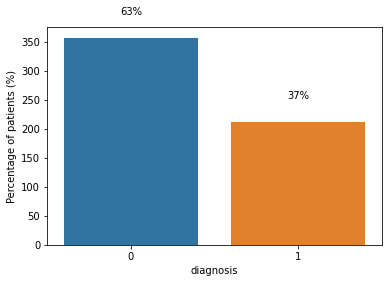

In [21]:
# lets get the % of Cancer Patients
print('Distribution of Cancer patients on whole data')
ax = sns.countplot(model_full['diagnosis'])
ax.set_ylabel('Percentage of patients (%)')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

Distribution of the data:
----------------------------------------------------
The total data has 569 rows and 33 columns

Malignent cases = 212  and % = 37.26 

Benign cases = 357  and % = 62.74 

----------------------------------------------------
Distribution of training data
----------------------------------------------------
The train data has 398 rows and 16 columns

The training data % = 69.95 

Malignent cases = 152  and % = 38.19 

Benign cases = 246  and % = 61.81 

----------------------------------------------------
Distribution of testing data
----------------------------------------------------
The test data has 171 rows and 16 columns

The testing data % = 30.05 

Malignent cases = 60  and % = 35.09 

Benign cases = 111  and % = 64.91 

Training data : Distribution of patients


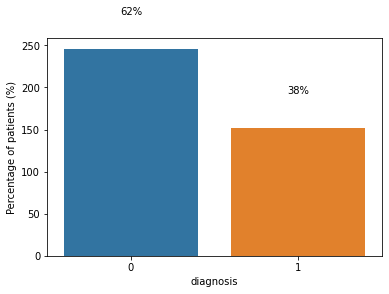

In [22]:
no, yes = model_full['diagnosis'].value_counts()
#X_train, y_train, X_test, y_test = LoadData()
print('Distribution of the data:')
print ('----------------------------------------------------')
print ('The total data has {0} rows and {1} columns'.format(model_full.shape[0],model_full.shape[1]))
print ('')
print ('Malignent cases = {0}  and % = {1} '.format(yes,np.round((yes/model_full.shape[0])*100,2)))
print ('')
print ('Benign cases = {0}  and % = {1} '.format(no,np.round((no/model_full.shape[0])*100,2)))
print ('')
print ('----------------------------------------------------')
print ('Distribution of training data')
print ('----------------------------------------------------')
print ('The train data has {0} rows and {1} columns'.format(X_train.shape[0],X_train.shape[1]))
print ('')
print ('The training data % = {0} '.format(np.round((X_train.shape[0]/model_full.shape[0])*100,2)))
print ('')
y_tr = y_train.sum()
n_tr = X_train.shape[0] -y_tr    #yes1
print ('Malignent cases = {0}  and % = {1} '.format(y_tr,np.round((y_tr/X_train.shape[0])*100,2)))
print ('')
print ('Benign cases = {0}  and % = {1} '.format(n_tr,np.round((n_tr/X_train.shape[0])*100,2)))
print ('')
print ('----------------------------------------------------')
print ('Distribution of testing data')
print ('----------------------------------------------------')
print ('The test data has {0} rows and {1} columns'.format(X_test.shape[0],X_test.shape[1]))
print ('')
print ('The testing data % = {0} '.format(np.round((X_test.shape[0]/model_full.shape[0])*100,2)))
print ('')
y_te = y_test.sum()
n_te = X_test.shape[0] -y_te
print ('Malignent cases = {0}  and % = {1} '.format(y_te,np.round((y_te/X_test.shape[0])*100,2)))
print ('')
print ('Benign cases = {0}  and % = {1} '.format(n_te,np.round((n_te/X_test.shape[0])*100,2)))
print ('')
# lets get the % of Blood Transfusion patients
print('Training data : Distribution of patients')
ax = sns.countplot(y_train)
ax.set_ylabel('Percentage of patients (%)')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

Testing data : Distribution of patients


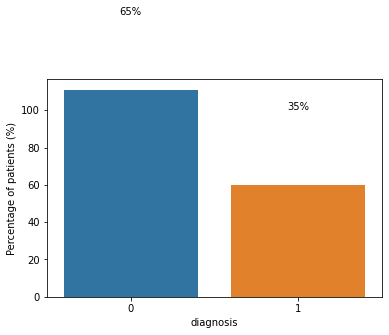

In [23]:
# lets get the % of Blood Transfusion patients
print('Testing data : Distribution of patients')
ax = sns.countplot(y_test)
ax.set_ylabel('Percentage of patients (%)')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

### Build models 

### Define basic non-linear classifiers

In [24]:
nonlr_clf_dict = dict()

# 1
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
nonlr_clf_dict['Logistic Regression'] = clf

# 2
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
nonlr_clf_dict['Random Forest Classifier'] = clf

# 3
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
nonlr_clf_dict['Gradient Boosting Classifier'] = clf

# 4
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
nonlr_clf_dict['Extra Trees Classifier'] = clf

# 5
from xgboost import XGBClassifier
clf = XGBClassifier()
nonlr_clf_dict['XGB Classifier'] = clf

# 6
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
nonlr_clf_dict['KNeighbors Classifier'] = clf

# 7
from sklearn.svm import SVC
clf = SVC(kernel='rbf',probability=True)   
nonlr_clf_dict['SVM Classifier'] = clf

# 8
from sklearn.naive_bayes import GaussianNB  
clf = GaussianNB() 
nonlr_clf_dict['naive_bayes'] = clf

# 9
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')
nonlr_clf_dict['Decision Tree Classifier'] = clf

# 10
from xgboost import XGBClassifier
clf = XGBClassifier()
nonlr_clf_dict['XGBoost Classifierr'] = clf

# 11
#from sklearn.linear_model import SGDClassifier
#clf = SGDClassifier()
#nonlr_clf_dict['Stochastic Gradient Decent Classifier'] = clf

# 11
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
nonlr_clf_dict['AdaBoost Classifier'] = clf
# 12
from catboost import CatBoostClassifier
clf = CatBoostClassifier()
nonlr_clf_dict['catboost Classifier'] = clf

### Build models 

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Logistic Regression
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.9723734177215189 0.012222566146985407

---------------------------------------------------------------------
Logistic Regression
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.9804166666666667 0.01600781059358212

---------------------------------------------------------------------
Logistic Regression
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.9475268817204302 0.04370091435653468

---------------------------------------------------------------------
Logistic Regression
-------------------------------------

[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


---------------------------------------------------------------------
Logistic Regression
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f average_precision 0.994017665645935 0.005364974553079667

---------------------------------------------------------------------
Logistic Regression
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.994294930875576 0.006767943324947326

Average precision-recall score: 0.99
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ accuracy               │             0.959064  │
├────────────────────────┼───────────────────────┤
│ precision              │             0.964912  │
├────────────────────────┼───────────────────────┤
│ recall        

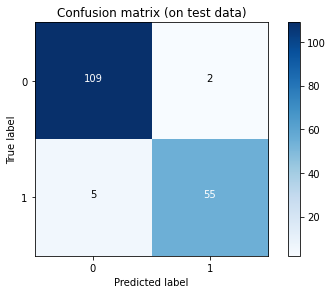

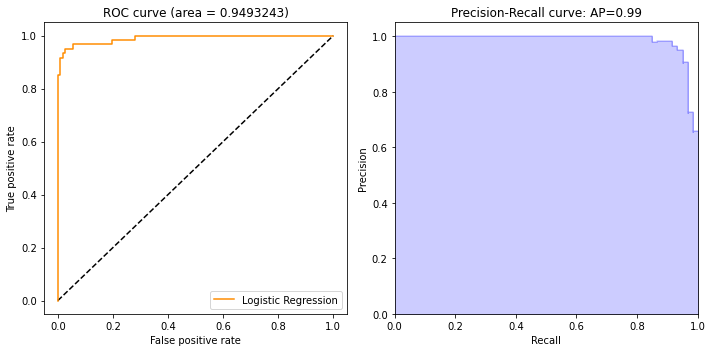

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.9549050632911392 0.035817976149948624



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.9381151170145478 0.06362081200295717



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.9470967741935483 0.026992460075239536



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f f1 0.9419513967555091 0.046455725702062425



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f average_precision 0.9883498087158585 0.010512542555341568



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.9915534342769365 0.0076435051755145336

Average precision-recall score: 0.98
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ accuracy               │             0.94152   │
├────────────────────────┼───────────────────────┤
│ precision              │             0.931034  │
├────────────────────────┼───────────────────────┤
│ recall                 │             0.9       │
├────────────────────────┼───────────────────────┤
│ misclassification rate │             0.0584795 │
├────────────────────────┼───────────────────────┤
│ F1                     │             0.915254  │
├────────────────────────┼───────────────────────┤
│ r

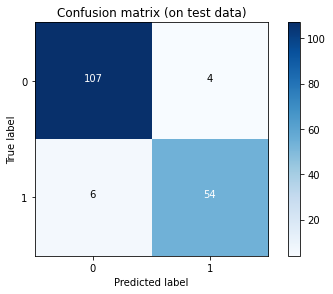

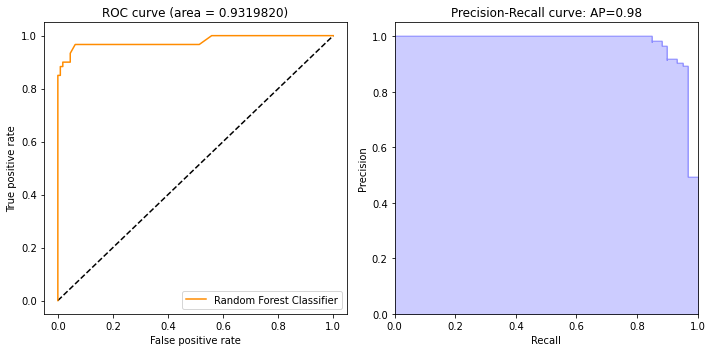

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.9547784810126583 0.024493221138709397



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.9376389265383572 0.04854266613219397



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.9406451612903226 0.025073830165852868



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f f1 0.9417176153411313 0.029919385543328667



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f average_precision 0.9867814726321612 0.013544267500163453



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.6s finished


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.9913630019749835 0.009074789480236038

Average precision-recall score: 0.97
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ accuracy               │             0.912281  │
├────────────────────────┼───────────────────────┤
│ precision              │             0.881356  │
├────────────────────────┼───────────────────────┤
│ recall                 │             0.866667  │
├────────────────────────┼───────────────────────┤
│ misclassification rate │             0.0877193 │
├────────────────────────┼───────────────────────┤
│ F1                     │             0.87395   │
├────────────────────────┼───────────────────────┤


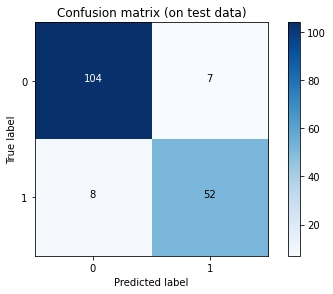

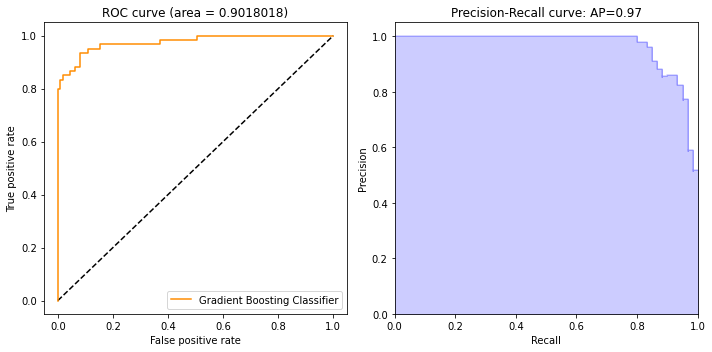

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.9574050632911393 0.0340353066538645



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.9475268817204301 0.026254180579839755



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.9475268817204301 0.025711294094329207



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f f1 0.9372443958447239 0.03866050177560634



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f average_precision 0.9879888975801938 0.008171007499278416



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished


---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.9909975861312267 0.0070545695378390364

Average precision-recall score: 0.98
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ accuracy               │             0.959064  │
├────────────────────────┼───────────────────────┤
│ precision              │             0.949153  │
├────────────────────────┼───────────────────────┤
│ recall                 │             0.933333  │
├────────────────────────┼───────────────────────┤
│ misclassification rate │             0.0409357 │
├────────────────────────┼───────────────────────┤
│ F1                     │             0.941176  │
├────────────────────────┼───────────────────────┤
│ r2 

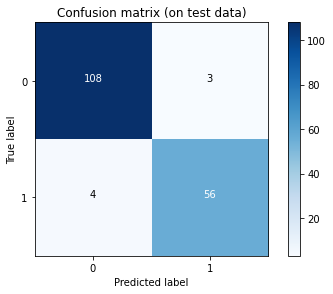

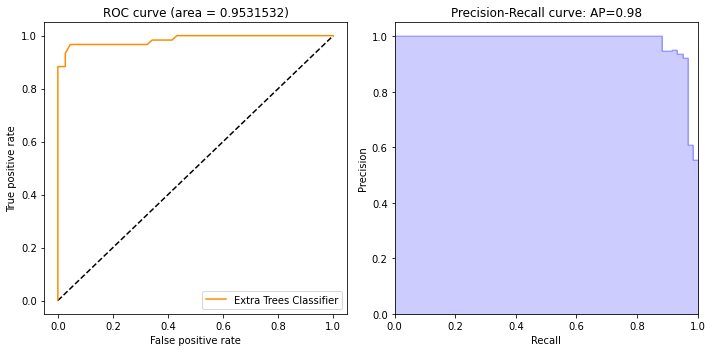

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.9548101265822784 0.036704304605949346

---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.9320028790159001 0.05922423263189786



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.953978494623656 0.03299095760381326

---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f f1 0.9424660696347276 0.044818980716819744



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished


---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f average_precision 0.9863025553281487 0.010567948212371874

---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.9898674566600836 0.00832131695181983

Average precision-recall score: 0.98
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ accuracy               │             0.964912  │
├────────────────────────┼───────────────────────┤
│ precision              │             0.95      │
├────────────────────────┼───────────────────────┤
│ recall                 

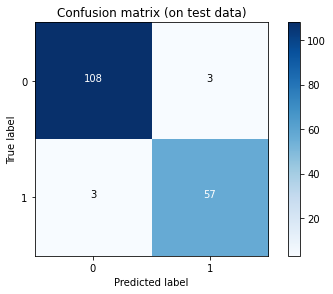

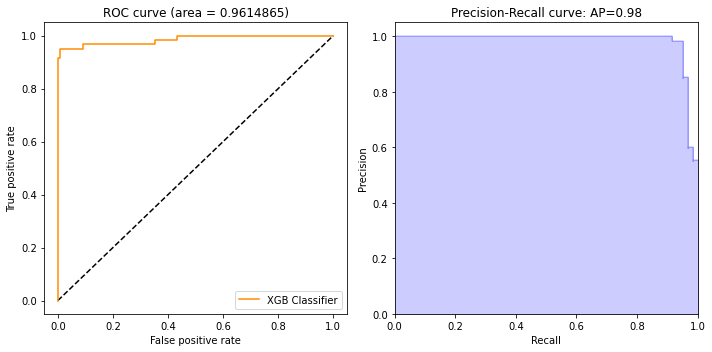


---------------------------------------------------------------------
KNeighbors Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.9498101265822785 0.030567949478675804

---------------------------------------------------------------------
KNeighbors Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.941650444938821 0.051324995490328144

---------------------------------------------------------------------
KNeighbors Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.927741935483871 0.0377870942651717

---------------------------------------------------------------------
KNeighbors Classifier
------------------------------

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


---------------------------------------------------------------------
KNeighbors Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f average_precision 0.9711501944648664 0.02692523267984865

---------------------------------------------------------------------
KNeighbors Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.9786375246872943 0.0196058739758022

Average precision-recall score: 0.97
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ accuracy               │             0.947368  │
├────────────────────────┼───────────────────────┤
│ precision              │             0.963636  │
├────────────────────────┼───────────────────────┤
│ recall     

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


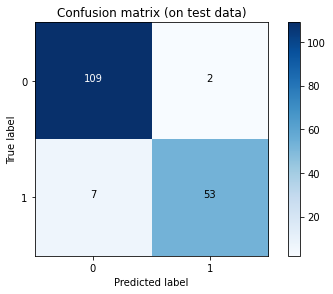

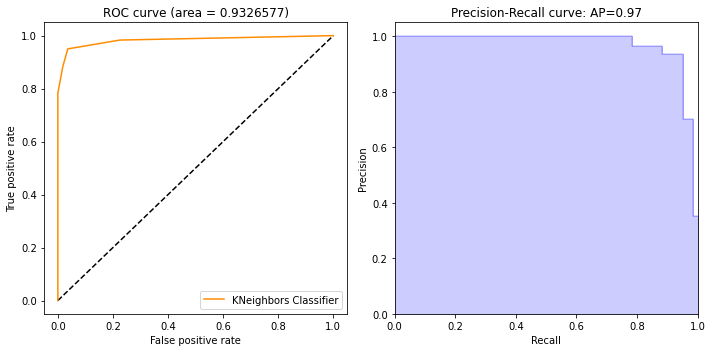


---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.959873417721519 0.024160433900396072

---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.9489784946236559 0.042244655729223986

---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.9475268817204302 0.025711294094329207



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f f1 0.947926880909977 0.03015655644249013

---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f average_precision 0.9883307394102978 0.011410453169872069

---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.9897637919684004 0.010723910678778604

Average precision-recall score: 0.98
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │


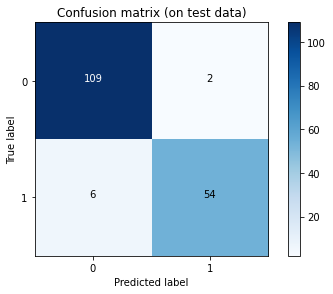

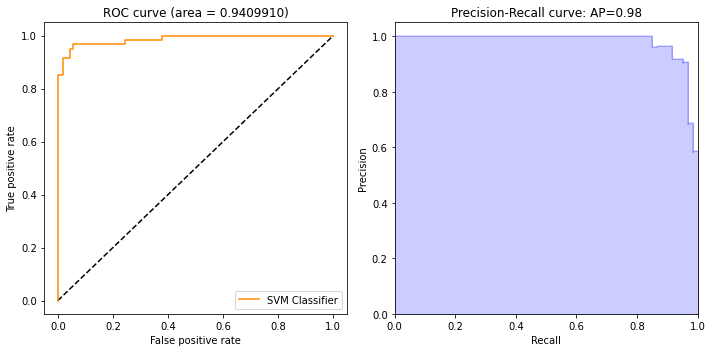


---------------------------------------------------------------------
naive_bayes
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.9322784810126581 0.05273171828342878

---------------------------------------------------------------------
naive_bayes
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.9192896033186415 0.0964774795324931

---------------------------------------------------------------------
naive_bayes
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.9141935483870969 0.03410077357920826

---------------------------------------------------------------------
naive_bayes
---------------------------------------------------------------------


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


---------------------------------------------------------------------
naive_bayes
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f average_precision 0.9605541512805262 0.050778770663217884

---------------------------------------------------------------------
naive_bayes
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.9756172920781216 0.027690412337567253

Average precision-recall score: 0.88
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ accuracy               │              0.888889 │
├────────────────────────┼───────────────────────┤
│ precision              │              0.836066 │
├────────────────────────┼───────────────────────┤
│ recall                 │    

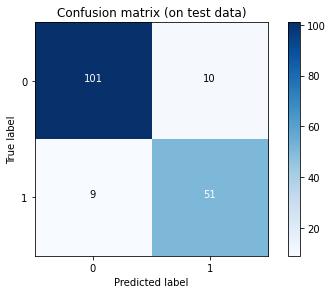

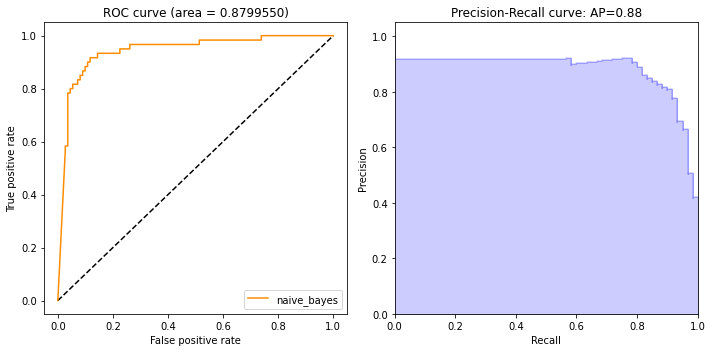


---------------------------------------------------------------------
Decision Tree Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.9246518987341773 0.02620902811901116

---------------------------------------------------------------------
Decision Tree Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.8914336190538507 0.07732610299167277

---------------------------------------------------------------------
Decision Tree Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.9273118279569893 0.02541458754851831

---------------------------------------------------------------------
Decision Tree Classifier
-----------------

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


Average precision-recall score: 0.84
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ accuracy               │             0.923977  │
├────────────────────────┼───────────────────────┤
│ precision              │             0.943396  │
├────────────────────────┼───────────────────────┤
│ recall                 │             0.833333  │
├────────────────────────┼───────────────────────┤
│ misclassification rate │             0.0760234 │
├────────────────────────┼───────────────────────┤
│ F1                     │             0.884956  │
├────────────────────────┼───────────────────────┤
│ r2                     │             0.666216  │
├────────────────────────┼───────────────────────┤
│ AUC                    │             0.903153  │
├────────────────────────┼───────────────────────┤
│ mse                    │             0.0760234 │
├────────────────────────┼───────────────────

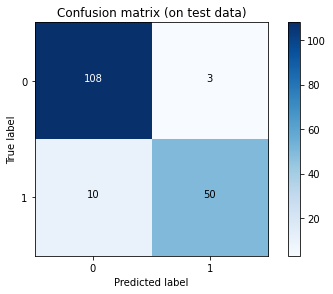

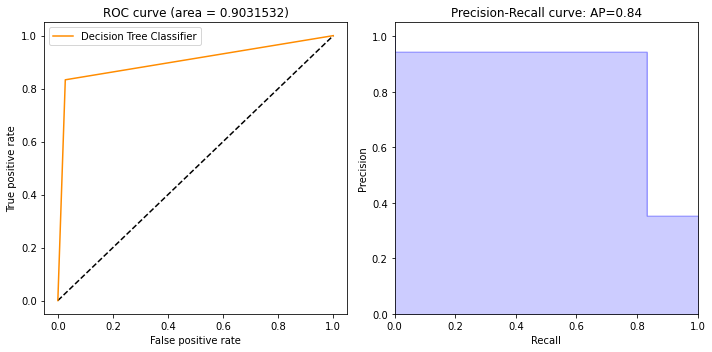

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished


---------------------------------------------------------------------
XGBoost Classifierr
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.9548101265822784 0.036704304605949346



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished


---------------------------------------------------------------------
XGBoost Classifierr
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.9320028790159001 0.05922423263189786

---------------------------------------------------------------------
XGBoost Classifierr
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.953978494623656 0.03299095760381326



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished


---------------------------------------------------------------------
XGBoost Classifierr
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f f1 0.9424660696347276 0.044818980716819744

---------------------------------------------------------------------
XGBoost Classifierr
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f average_precision 0.9863025553281487 0.010567948212371874



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished


---------------------------------------------------------------------
XGBoost Classifierr
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.9898674566600836 0.00832131695181983

Average precision-recall score: 0.98
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ accuracy               │             0.964912  │
├────────────────────────┼───────────────────────┤
│ precision              │             0.95      │
├────────────────────────┼───────────────────────┤
│ recall                 │             0.95      │
├────────────────────────┼───────────────────────┤
│ misclassification rate │             0.0350877 │
├────────────────────────┼───────────────────────┤
│ F1                     │             0.95      │
├────────────────────────┼───────────────────────┤
│ r2      

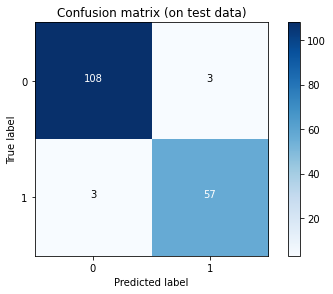

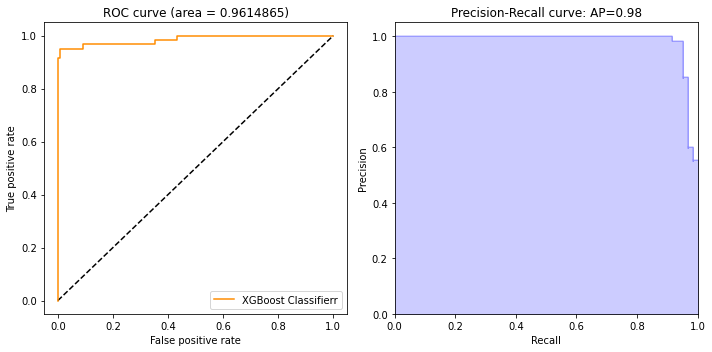

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
AdaBoost Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.9422784810126583 0.028019002353219725



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
AdaBoost Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.9452362707535121 0.04046991178027332



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
AdaBoost Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.9012903225806452 0.04185766145411391



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
AdaBoost Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f f1 0.9224431737860908 0.03764706883396423



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
AdaBoost Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f average_precision 0.9795451562228757 0.011684984081609683



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.3s finished


---------------------------------------------------------------------
AdaBoost Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.9855074829931972 0.008574258922409629

Average precision-recall score: 0.98
╒════════════════════════╤═══════════════════════╕
│ Metric                 │   Testing Performance │
╞════════════════════════╪═══════════════════════╡
│ accuracy               │             0.953216  │
├────────────────────────┼───────────────────────┤
│ precision              │             0.948276  │
├────────────────────────┼───────────────────────┤
│ recall                 │             0.916667  │
├────────────────────────┼───────────────────────┤
│ misclassification rate │             0.0467836 │
├────────────────────────┼───────────────────────┤
│ F1                     │             0.932203  │
├────────────────────────┼───────────────────────┤
│ r2     

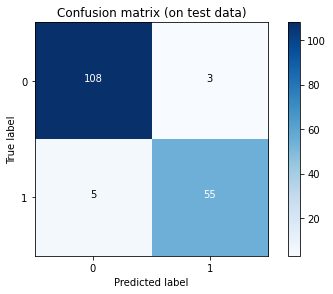

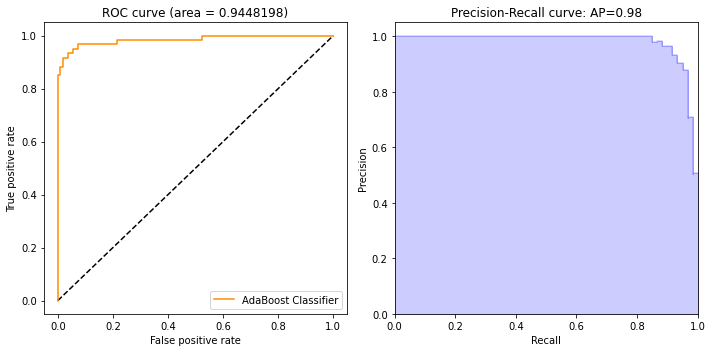

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   13.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
catboost Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f accuracy 0.9523417721518987 0.03295417739898211



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   13.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
catboost Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f precision 0.9327649769585253 0.06077228143233021



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   12.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
catboost Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f recall 0.9473118279569892 0.03396215749892418



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   12.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
catboost Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f f1 0.9390136526371687 0.04026924886728545



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   12.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------
catboost Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f average_precision 0.9887513961689424 0.009115984990437193



[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   12.6s finished


---------------------------------------------------------------------
catboost Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
Scoring Name: CV mean: %.5f CV std: %.5f roc_auc 0.9920075488259819 0.006777475813221669

Learning rate set to 0.006952
0:	learn: 0.6818670	total: 49.8ms	remaining: 49.8s
1:	learn: 0.6718584	total: 53ms	remaining: 26.5s
2:	learn: 0.6632133	total: 56ms	remaining: 18.6s
3:	learn: 0.6513062	total: 58.8ms	remaining: 14.6s
4:	learn: 0.6421039	total: 61.7ms	remaining: 12.3s
5:	learn: 0.6303812	total: 64.6ms	remaining: 10.7s
6:	learn: 0.6201155	total: 67.4ms	remaining: 9.56s
7:	learn: 0.6100360	total: 70.2ms	remaining: 8.71s
8:	learn: 0.6002736	total: 73.1ms	remaining: 8.05s
9:	learn: 0.5910642	total: 75.8ms	remaining: 7.51s
10:	learn: 0.5829580	total: 78.7ms	remaining: 7.07s
11:	learn: 0.5755454	total: 81.2ms	remaining: 6.69s
12:	learn: 0.5659610	total: 83.9ms	remaining: 6.37s
13:	learn: 0.5583

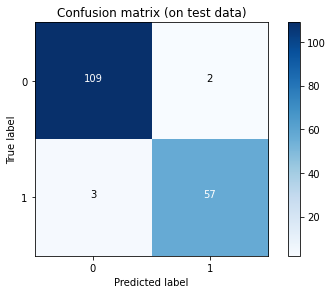

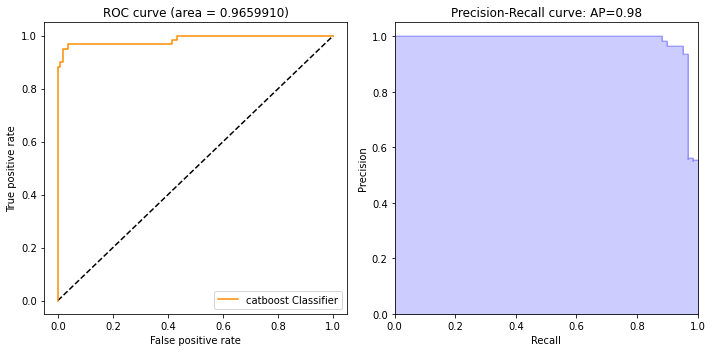

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
import numpy as np

folds = 5
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 10345)
scoring_strings = ['accuracy', 'precision', 'recall', 'f1',
                       'average_precision', 'roc_auc']
trainPerformanceData = pd.DataFrame(columns = ['Algorithm','Scoring Name','CV mean', 'CV std']) 
testPerformanceData = pd.DataFrame(columns = ['Algorithm','Accuracy','AUC','Precision','Recall','F1'])
# timing starts from this point for "start_time" variable
#start_time = timer(None)
for clf_name, clf in nonlr_clf_dict.items():
    for scoring in scoring_strings:
        scores = cross_val_score(clf, X_train, y_train, scoring=scoring, cv=skf,verbose=1, n_jobs=2)
        print("---------------------------------------------------------------------") 
        print(clf_name)
        print("---------------------------------------------------------------------") 
        print("Cross Validation scores on training data")
        print ('Scoring Name: CV mean: %.5f CV std: %.5f',scoring,np.mean(np.abs(scores)),np.std(scores))
        print("") 
        # append rows to an empty DataFrame 
        trainPerformanceData = trainPerformanceData.append({'Algorithm' : clf_name, 'Scoring Name' : scoring, 'CV mean' : np.mean(np.abs(scores)),'CV std' : np.std(scores)},  
                ignore_index = True) 
        
    clf.fit(X_train, y_train)
    y_predicted_test  = clf.predict(X_test)
    y_probabilities_test = clf.predict_proba(X_test)
    y_probabilities_success = y_probabilities_test[:, 1]

    from sklearn.metrics import average_precision_score
    average_precision = average_precision_score(y_test, y_probabilities_success)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))

    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities_success)

    mse        = mean_squared_error(y_test, y_predicted_test)
    logloss    = log_loss(y_test, y_predicted_test)
    accuracy   = accuracy_score(y_test, y_predicted_test)
    precision  = precision_score(y_test, y_predicted_test, average='binary')
    recall     = recall_score(y_test, y_predicted_test, average='binary')
    F1         = f1_score(y_test, y_predicted_test)
    r2         = r2_score(y_test, y_predicted_test)
    auc        = roc_auc_score(y_test, y_predicted_test)
    cm         = confusion_matrix(y_test, y_predicted_test)
    #testPerformanceData = testPerformanceData.append({'Algorithm' : clf_name,'Accuracy' : accuracy,'Average_Precision':average_precision,'F1' : F1 ,'Precision' : precision,'Recall' : recall,'AUC' : auc},ignore_index = True)
    Print_Model_Metrics(clf_name)
    Plot_Confusion_Matrix(clf)
    Plot_ROC_Precision_Recall(clf_name)
    #auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print("")  
    #print("AUC scores on testing data")       
    #print(clf_name, 'auc score:', auc)
#timer(start_time)

In [26]:
trainPerformanceData

,Algorithm,Scoring Name,CV mean,CV std
0,Logistic Regression,accuracy,0.972373,0.012223
1,Logistic Regression,precision,0.980417,0.016008
2,Logistic Regression,recall,0.947527,0.043701
3,Logistic Regression,f1,0.962802,0.017327
4,Logistic Regression,average_precision,0.994018,0.005365
...,...,...,...,...
67,catboost Classifier,precision,0.932765,0.060772
68,catboost Classifier,recall,0.947312,0.033962
69,catboost Classifier,f1,0.939014,0.040269
70,catboost Classifier,average_precision,0.988751,0.009116


In [27]:
trainPerformanceData_pvt=pd.pivot_table(trainPerformanceData,index=["Algorithm"],values=["CV mean"],columns=["Scoring Name"],aggfunc=[np.min])
trainPerformanceData_pvt

amin                    ...                    
                               CV mean                    ...                    
Scoring Name                  accuracy average_precision  ...    recall   roc_auc
Algorithm                                                 ...                    
AdaBoost Classifier           0.942278          0.979545  ...  0.901290  0.985507
Decision Tree Classifier      0.924652          0.856381  ...  0.927312  0.921899
Extra Trees Classifier        0.957405          0.987989  ...  0.947527  0.990998
Gradient Boosting Classifier  0.954778          0.986781  ...  0.940645  0.991363
KNeighbors Classifier         0.949810          0.971150  ...  0.927742  0.978638
Logistic Regression           0.972373          0.994018  ...  0.947527  0.994295
Random Forest Classifier      0.954905          0.988350  ...  0.947097  0.991553
SVM Classifier                0.959873          0.988331  ...  0.947527  0.989764
XGB Classifier                0.954810          0.986303  ...  0.953978  0.989867
XGBoost Classifierr           0.954810          0.986303  ...  0.953978  0.989867
catboost Classifier           0.952342          0.988751  ...  0.947312  0.992008
naive_bayes                   0.932278          0.960554  ...  0.914194  0.975617

[12 rows x 6 columns]

In [28]:
testPerformanceData.sort_values(by=['Algorithm'])

,Algorithm,Accuracy,AUC,Precision,Recall,F1
10,AdaBoost Classifier,0.953216,0.944820,0.948276,0.916667,0.932203
8,Decision Tree Classifier,0.923977,0.903153,0.943396,0.833333,0.884956
3,Extra Trees Classifier,0.959064,0.953153,0.949153,0.933333,0.941176
2,Gradient Boosting Classifier,0.912281,0.901802,0.881356,0.866667,0.873950
5,KNeighbors Classifier,0.947368,0.932658,0.963636,0.883333,0.921739
0,Logistic Regression,0.959064,0.949324,0.964912,0.916667,0.940171
1,Random Forest Classifier,0.941520,0.931982,0.931034,0.900000,0.915254
6,SVM Classifier,0.953216,0.940991,0.964286,0.900000,0.931034
4,XGB Classifier,0.964912,0.961486,0.950000,0.950000,0.950000
9,XGBoost Classifierr,0.964912,0.961486,0.950000,0.950000,0.950000


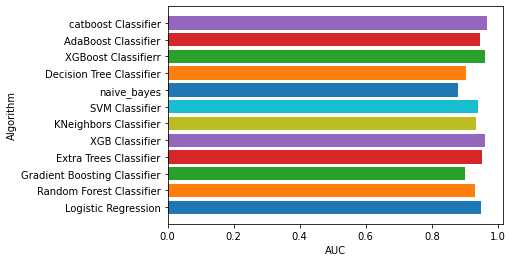

In [29]:
# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(6, 4)) 
  
color =['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:olive', 'tab:cyan'] 
  
ax.barh(testPerformanceData["Algorithm"], testPerformanceData['AUC'], color = color) 
  
#ax.spines['bottom'].set_position('zero') 
plt.style.use('ggplot') 
plt.ylabel('Algorithm')
plt.xlabel('AUC')
#plt.title('AUC value of Algorithms ')
plt.show() 

## Conclusions

Thus, the most significant features in predicting malignant or benign for cancer patients obtained by algorithms are texture_mean, area_mean, concavity_mean, area_se, concavity_se, fractal_dimension_se, smoothness_worst, concavity_worst, symmetry_worst, fractal_dimension_worst.
To obtain best results from predictive model, many different models are trained, optimized, and evaluated using 16 set of features. During this process the feature set itself is culled using model-specific methods. Each model and subset of features is evaluated using Accuracy, AUC and sensitivity using a 5-fold cross-validation. Best results are obtained with Logistic regression, with the random forest feature set culled to 10 features. Above table shows the performance measures of the classification techniques. The logistic regression achieved an accuracy and AUC of 0.977 and 0.971 on test data.

# **Hypertuning**

In [30]:
#Here, we used the same optimal feature sets that we selected in Part 2 because we want to compare optimized model with previous one. 
#We also tried with all features and see the performance of the model and it dint work out .

In [73]:
x_train, y_train, x_test, y_test = LoadData()
from sklearn.preprocessing import StandardScaler
# Included the relevant features 
x_train = x_train[fs_extraTree]
x_test = x_test[fs_extraTree]
# scaling data
scale = StandardScaler()
X_train = scale.fit_transform(x_train)
X_test = scale.fit_transform(x_test)

**Define Hyperparameter Grid for RandomizedSearchCV**

In [74]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
models1 = {
    'Logistic Regression' : LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'KNeighbors Classifier' : KNeighborsClassifier(),   
    'SVC': SVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'XGBClassifier':XGBClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'CatBoostClassifier':CatBoostClassifier()
}
params1 = {
 'Logistic Regression' : {'penalty' : ['l1','l2'], 'C' : np.logspace(0, 4, 100), 'solver' :['liblinear']},
 'RandomForestClassifier': { 'n_estimators': [10, 50, 100, 120, 300, 500, 800, 1200], 'max_depth': [2, 5,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'] },
 'GradientBoostingClassifier': { 'n_estimators': [10,50, 100, 500, 1000], 'learning_rate': [0.01,0.1, 1.0] },
 'ExtraTreesClassifier': { 'n_estimators': [10, 50, 100, 120, 300, 500, 800, 1200] },
 'KNeighbors Classifier' : {'n_neighbors' :[1,2,5,6,7,10,13,17,20], 'weights':['uniform', 'distance']}, 
 'SVC': {'kernel': ['linear','rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
 'DecisionTreeClassifier': { 'max_depth': [2, 5,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],'min_samples_leaf': [1,5, 10, 20, 50, 100],'criterion': ["gini", "entropy"]},
 'XGBClassifier':{ 'n_estimators': [10,50, 100, 500, 1000], 'learning_rate': [0.01,0.1, 1.0] },
 'AdaBoostClassifier':{ 'n_estimators': [10, 50, 100, 120, 300, 500, 800, 1200] },
 'CatBoostClassifier':{ 'n_estimators': [10, 50, 100, 120, 300, 500, 800, 1200], 'learning_rate': [0.01,0.1, 1.0] }
}

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=5, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running RandomizedSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = RandomizedSearchCV(estimator= model, param_distributions = params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, random_state = 2020)
            gs.fit(X,y)
            print('=====================================================================')
            print('Best Score: %s' % gs.fit(X,y).best_score_)
            print('Best Hyperparameters: %s' % gs.fit(X,y).best_params_)
            print('=====================================================================')
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [34]:
pip install fsspec

     |████████████████████████████████| 125 kB 8.5 MB/s 


In [76]:
# Define the scoring 
scoring_strings = ['accuracy', 'precision', 'recall', 'f1', 'average_precision','roc_auc']
scores_all = pd.DataFrame() 
# Create object of the class helper
helper1 = EstimatorSelectionHelper(models1, params1)
flag=True
for scoring in scoring_strings:
    helper1.fit(x_test, y_test, cv=5, scoring=scoring, n_jobs=2)
    df_scores = helper1.score_summary(sort_by='max_score')
    if flag: 
       # Saving each model for each scoring. Plz change with ur path
        #df_scores.to_csv("C://map//"+scoring+".csv")
        df_scores.to_csv('df_scores.csv')
        df_scores['scoring_name']=scoring
        scores_all = df_scores
        print(scoring)
        print(scores_all)
        flag=False
    else:
# Saving each model for each scoring. Plz change with ur path
        #df_scores.to_csv("C://map//"+scoring+".csv")
        df_scores.to_csv('df_scores.csv')
        df_scores['scoring_name']=scoring
        scores_all= scores_all.append(df_scores, ignore_index=True, sort=False)
        print(scoring)
        print(scores_all)
        
# Saving each model for each scoring. Plz change with ur path
#scores_all.to_csv("C://map//"+scores_all+".csv")
scores_all.to_csv('scores_all.csv')

Running RandomizedSearchCV for Logistic Regression.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    1.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9529411764705882
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10000.0}
Running RandomizedSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9475630252100841
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 100}
Running RandomizedSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9416806722689074
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished


Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 1.0}
Running RandomizedSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9416806722689076
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 50}
Running RandomizedSearchCV for KNeighbors Classifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9063865546218487
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'weights': 'uniform', 'n_neighbors': 2}
Running RandomizedSearchCV for SVC.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.1s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.0s finished


Best Score: 0.9470588235294117
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.0s finished


Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 10}
Running RandomizedSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8652100840336134
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_leaf': 10, 'max_depth': 50, 'criterion': 'entropy'}
Running RandomizedSearchCV for XGBClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    3.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished


Best Score: 0.9357983193277309
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.7s finished


Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 0.01}
Running RandomizedSearchCV for AdaBoostClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.0s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.0s finished


Best Score: 0.9647058823529411
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.1s finished


Best Hyperparameters: {'n_estimators': 500}
Running RandomizedSearchCV for CatBoostClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   26.3s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   26.7s finished


0:	learn: 0.5983230	total: 2.45ms	remaining: 733ms
1:	learn: 0.5128477	total: 4.25ms	remaining: 634ms
2:	learn: 0.4463161	total: 5.81ms	remaining: 575ms
3:	learn: 0.3853708	total: 7.33ms	remaining: 543ms
4:	learn: 0.3337216	total: 8.9ms	remaining: 525ms
5:	learn: 0.2843049	total: 10.4ms	remaining: 508ms
6:	learn: 0.2509894	total: 11.9ms	remaining: 497ms
7:	learn: 0.2247379	total: 13.3ms	remaining: 487ms
8:	learn: 0.1993755	total: 14.7ms	remaining: 477ms
9:	learn: 0.1826956	total: 16.2ms	remaining: 470ms
10:	learn: 0.1636677	total: 17.7ms	remaining: 466ms
11:	learn: 0.1497661	total: 19.3ms	remaining: 462ms
12:	learn: 0.1355104	total: 20.7ms	remaining: 457ms
13:	learn: 0.1247448	total: 22.2ms	remaining: 454ms
14:	learn: 0.1163079	total: 23.7ms	remaining: 450ms
15:	learn: 0.1091096	total: 25.1ms	remaining: 445ms
16:	learn: 0.1017620	total: 26.6ms	remaining: 443ms
17:	learn: 0.0973031	total: 28.2ms	remaining: 441ms
18:	learn: 0.0914841	total: 29.6ms	remaining: 438ms
19:	learn: 0.0848787	to

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   24.2s finished


0:	learn: 0.5983230	total: 4.03ms	remaining: 1.21s
1:	learn: 0.5128477	total: 6.26ms	remaining: 933ms
2:	learn: 0.4463161	total: 7.99ms	remaining: 791ms
3:	learn: 0.3853708	total: 9.87ms	remaining: 730ms
4:	learn: 0.3337216	total: 11.6ms	remaining: 683ms
5:	learn: 0.2843049	total: 13.3ms	remaining: 652ms
6:	learn: 0.2509894	total: 15ms	remaining: 630ms
7:	learn: 0.2247379	total: 16.5ms	remaining: 604ms
8:	learn: 0.1993755	total: 18ms	remaining: 581ms
9:	learn: 0.1826956	total: 19.5ms	remaining: 567ms
10:	learn: 0.1636677	total: 21ms	remaining: 552ms
11:	learn: 0.1497661	total: 22.4ms	remaining: 539ms
12:	learn: 0.1355104	total: 24ms	remaining: 529ms
13:	learn: 0.1247448	total: 25.5ms	remaining: 521ms
14:	learn: 0.1163079	total: 27ms	remaining: 513ms
15:	learn: 0.1091096	total: 28.5ms	remaining: 506ms
16:	learn: 0.1017620	total: 30ms	remaining: 499ms
17:	learn: 0.0973031	total: 31.4ms	remaining: 492ms
18:	learn: 0.0914841	total: 33ms	remaining: 488ms
19:	learn: 0.0848787	total: 34.4ms	r

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   24.1s finished


0:	learn: 0.5983230	total: 1.38ms	remaining: 412ms
1:	learn: 0.5128477	total: 3.35ms	remaining: 499ms
2:	learn: 0.4463161	total: 4.82ms	remaining: 477ms
3:	learn: 0.3853708	total: 6.41ms	remaining: 475ms
4:	learn: 0.3337216	total: 8.17ms	remaining: 482ms
5:	learn: 0.2843049	total: 9.72ms	remaining: 476ms
6:	learn: 0.2509894	total: 11.2ms	remaining: 470ms
7:	learn: 0.2247379	total: 12.8ms	remaining: 466ms
8:	learn: 0.1993755	total: 14.2ms	remaining: 459ms
9:	learn: 0.1826956	total: 15.7ms	remaining: 454ms
10:	learn: 0.1636677	total: 17.3ms	remaining: 453ms
11:	learn: 0.1497661	total: 18.5ms	remaining: 444ms
12:	learn: 0.1355104	total: 19.9ms	remaining: 440ms
13:	learn: 0.1247448	total: 21.4ms	remaining: 437ms
14:	learn: 0.1163079	total: 22.9ms	remaining: 436ms
15:	learn: 0.1091096	total: 24.4ms	remaining: 433ms
16:	learn: 0.1017620	total: 25.9ms	remaining: 431ms
17:	learn: 0.0973031	total: 27.3ms	remaining: 428ms
18:	learn: 0.0914841	total: 28.8ms	remaining: 426ms
19:	learn: 0.0848787	t

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9380952380952381
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 811.1308307896873}
Running RandomizedSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9833333333333332
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 50, 'max_features': 'auto', 'max_depth': 100}
Running RandomizedSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.6s finished


Best Score: 0.9692307692307693
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 50, 'learning_rate': 0.01}
Running RandomizedSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9651515151515152
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 10}
Running RandomizedSearchCV for KNeighbors Classifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9800000000000001
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'weights': 'uniform', 'n_neighbors': 2}
Running RandomizedSearchCV for SVC.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.0s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.0s finished


Best Score: 0.9333333333333333
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.0s finished


Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 10}
Running RandomizedSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.862937062937063
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_leaf': 20, 'max_depth': 80, 'criterion': 'gini'}
Running RandomizedSearchCV for XGBClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    3.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished


Best Score: 0.9343822843822844
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.7s finished


Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 0.01}
Running RandomizedSearchCV for AdaBoostClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.1s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.0s finished


Best Score: 0.9818181818181818
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.1s finished


Best Hyperparameters: {'n_estimators': 500}
Running RandomizedSearchCV for CatBoostClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   24.3s finished


0:	learn: 0.6829942	total: 1.52ms	remaining: 1.22s
1:	learn: 0.6720385	total: 2.9ms	remaining: 1.16s
2:	learn: 0.6613335	total: 4.33ms	remaining: 1.15s
3:	learn: 0.6493187	total: 5.76ms	remaining: 1.15s
4:	learn: 0.6389580	total: 7.21ms	remaining: 1.15s
5:	learn: 0.6255150	total: 8.7ms	remaining: 1.15s
6:	learn: 0.6134598	total: 10.1ms	remaining: 1.15s
7:	learn: 0.6029717	total: 11.6ms	remaining: 1.15s
8:	learn: 0.5923861	total: 13ms	remaining: 1.14s
9:	learn: 0.5831936	total: 14.5ms	remaining: 1.14s
10:	learn: 0.5731224	total: 15.9ms	remaining: 1.14s
11:	learn: 0.5629420	total: 17.3ms	remaining: 1.14s
12:	learn: 0.5516801	total: 19ms	remaining: 1.15s
13:	learn: 0.5423839	total: 20.5ms	remaining: 1.15s
14:	learn: 0.5326966	total: 22ms	remaining: 1.15s
15:	learn: 0.5248722	total: 23.6ms	remaining: 1.15s
16:	learn: 0.5155242	total: 25.1ms	remaining: 1.16s
17:	learn: 0.5076012	total: 26.6ms	remaining: 1.16s
18:	learn: 0.4998405	total: 28.1ms	remaining: 1.16s
19:	learn: 0.4921071	total: 29

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   24.4s finished


0:	learn: 0.6829942	total: 1.51ms	remaining: 1.2s
1:	learn: 0.6720385	total: 3.47ms	remaining: 1.39s
2:	learn: 0.6613335	total: 4.95ms	remaining: 1.31s
3:	learn: 0.6493187	total: 6.52ms	remaining: 1.3s
4:	learn: 0.6389580	total: 8.05ms	remaining: 1.28s
5:	learn: 0.6255150	total: 9.57ms	remaining: 1.27s
6:	learn: 0.6134598	total: 11.2ms	remaining: 1.27s
7:	learn: 0.6029717	total: 12.8ms	remaining: 1.27s
8:	learn: 0.5923861	total: 14.4ms	remaining: 1.26s
9:	learn: 0.5831936	total: 16ms	remaining: 1.26s
10:	learn: 0.5731224	total: 17.7ms	remaining: 1.27s
11:	learn: 0.5629420	total: 19.1ms	remaining: 1.25s
12:	learn: 0.5516801	total: 20.7ms	remaining: 1.25s
13:	learn: 0.5423839	total: 22.2ms	remaining: 1.25s
14:	learn: 0.5326966	total: 23.8ms	remaining: 1.24s
15:	learn: 0.5248722	total: 25.2ms	remaining: 1.23s
16:	learn: 0.5155242	total: 26.7ms	remaining: 1.23s
17:	learn: 0.5076012	total: 28.1ms	remaining: 1.22s
18:	learn: 0.4998405	total: 29.6ms	remaining: 1.22s
19:	learn: 0.4921071	total

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.9s finished


0:	learn: 0.6829942	total: 1.88ms	remaining: 1.5s
1:	learn: 0.6720385	total: 3.83ms	remaining: 1.53s
2:	learn: 0.6613335	total: 5.47ms	remaining: 1.45s
3:	learn: 0.6493187	total: 7.15ms	remaining: 1.42s
4:	learn: 0.6389580	total: 8.9ms	remaining: 1.41s
5:	learn: 0.6255150	total: 10.6ms	remaining: 1.4s
6:	learn: 0.6134598	total: 12.2ms	remaining: 1.38s
7:	learn: 0.6029717	total: 13.9ms	remaining: 1.38s
8:	learn: 0.5923861	total: 15.5ms	remaining: 1.36s
9:	learn: 0.5831936	total: 17.2ms	remaining: 1.36s
10:	learn: 0.5731224	total: 18.9ms	remaining: 1.35s
11:	learn: 0.5629420	total: 20.5ms	remaining: 1.34s
12:	learn: 0.5516801	total: 22.1ms	remaining: 1.34s
13:	learn: 0.5423839	total: 23.8ms	remaining: 1.34s
14:	learn: 0.5326966	total: 25.6ms	remaining: 1.34s
15:	learn: 0.5248722	total: 27.3ms	remaining: 1.34s
16:	learn: 0.5155242	total: 29ms	remaining: 1.33s
17:	learn: 0.5076012	total: 30.6ms	remaining: 1.33s
18:	learn: 0.4998405	total: 32.2ms	remaining: 1.32s
19:	learn: 0.4921071	total:

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished


Best Score: 0.95
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 5722.3676593502205}
Running RandomizedSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8833333333333334
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 100}
Running RandomizedSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished


Best Score: 0.8833333333333334
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 10, 'learning_rate': 1.0}
Running RandomizedSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8666666666666666
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 120}
Running RandomizedSearchCV for KNeighbors Classifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8166666666666667
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 5}
Running RandomizedSearchCV for SVC.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.0s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    8.9s finished


Best Score: 0.9166666666666666
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.0s finished


Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 10}
Running RandomizedSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_leaf': 10, 'max_depth': 50, 'criterion': 'entropy'}
Running RandomizedSearchCV for XGBClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8833333333333334
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 0.1}
Running RandomizedSearchCV for AdaBoostClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.0s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.1s finished


Best Score: 0.9166666666666666
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.0s finished


Best Hyperparameters: {'n_estimators': 500}
Running RandomizedSearchCV for CatBoostClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.9s finished


0:	learn: 0.6829942	total: 1.53ms	remaining: 457ms
1:	learn: 0.6720385	total: 3.41ms	remaining: 508ms
2:	learn: 0.6613335	total: 5.03ms	remaining: 498ms
3:	learn: 0.6493187	total: 6.72ms	remaining: 497ms
4:	learn: 0.6389580	total: 8.41ms	remaining: 496ms
5:	learn: 0.6255150	total: 10.1ms	remaining: 496ms
6:	learn: 0.6134598	total: 11.8ms	remaining: 492ms
7:	learn: 0.6029717	total: 13.4ms	remaining: 490ms
8:	learn: 0.5923861	total: 15.2ms	remaining: 492ms
9:	learn: 0.5831936	total: 16.8ms	remaining: 488ms
10:	learn: 0.5731224	total: 18.4ms	remaining: 483ms
11:	learn: 0.5629420	total: 19.9ms	remaining: 478ms
12:	learn: 0.5516801	total: 21.5ms	remaining: 475ms
13:	learn: 0.5423839	total: 23.2ms	remaining: 473ms
14:	learn: 0.5326966	total: 24.9ms	remaining: 474ms
15:	learn: 0.5248722	total: 26.7ms	remaining: 474ms
16:	learn: 0.5155242	total: 28.3ms	remaining: 471ms
17:	learn: 0.5076012	total: 29.9ms	remaining: 468ms
18:	learn: 0.4998405	total: 31.5ms	remaining: 466ms
19:	learn: 0.4921071	t

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   24.1s finished


0:	learn: 0.6829942	total: 1.5ms	remaining: 450ms
1:	learn: 0.6720385	total: 3.71ms	remaining: 553ms
2:	learn: 0.6613335	total: 5.42ms	remaining: 537ms
3:	learn: 0.6493187	total: 7.14ms	remaining: 529ms
4:	learn: 0.6389580	total: 8.89ms	remaining: 524ms
5:	learn: 0.6255150	total: 10.6ms	remaining: 520ms
6:	learn: 0.6134598	total: 12.3ms	remaining: 513ms
7:	learn: 0.6029717	total: 14ms	remaining: 509ms
8:	learn: 0.5923861	total: 15.6ms	remaining: 503ms
9:	learn: 0.5831936	total: 17.2ms	remaining: 499ms
10:	learn: 0.5731224	total: 19ms	remaining: 498ms
11:	learn: 0.5629420	total: 20.7ms	remaining: 498ms
12:	learn: 0.5516801	total: 22.5ms	remaining: 496ms
13:	learn: 0.5423839	total: 24.1ms	remaining: 492ms
14:	learn: 0.5326966	total: 25.7ms	remaining: 489ms
15:	learn: 0.5248722	total: 27.4ms	remaining: 487ms
16:	learn: 0.5155242	total: 29.1ms	remaining: 484ms
17:	learn: 0.5076012	total: 30.7ms	remaining: 481ms
18:	learn: 0.4998405	total: 32.3ms	remaining: 478ms
19:	learn: 0.4921071	total:

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.8s finished


0:	learn: 0.6829942	total: 1.42ms	remaining: 425ms
1:	learn: 0.6720385	total: 3.37ms	remaining: 502ms
2:	learn: 0.6613335	total: 5ms	remaining: 495ms
3:	learn: 0.6493187	total: 6.67ms	remaining: 493ms
4:	learn: 0.6389580	total: 8.34ms	remaining: 492ms
5:	learn: 0.6255150	total: 9.98ms	remaining: 489ms
6:	learn: 0.6134598	total: 11.7ms	remaining: 490ms
7:	learn: 0.6029717	total: 13.4ms	remaining: 490ms
8:	learn: 0.5923861	total: 15.1ms	remaining: 488ms
9:	learn: 0.5831936	total: 16.6ms	remaining: 482ms
10:	learn: 0.5731224	total: 18.3ms	remaining: 480ms
11:	learn: 0.5629420	total: 19.9ms	remaining: 478ms
12:	learn: 0.5516801	total: 21.5ms	remaining: 476ms
13:	learn: 0.5423839	total: 23.3ms	remaining: 475ms
14:	learn: 0.5326966	total: 25.1ms	remaining: 477ms
15:	learn: 0.5248722	total: 26.9ms	remaining: 478ms
16:	learn: 0.5155242	total: 28.6ms	remaining: 476ms
17:	learn: 0.5076012	total: 30.2ms	remaining: 473ms
18:	learn: 0.4998405	total: 31.6ms	remaining: 467ms
19:	learn: 0.4921071	tota

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9346666666666665
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 6892.612104349702}
Running RandomizedSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9200922266139656
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 60}
Running RandomizedSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished


Best Score: 0.9147329192546584
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.6s finished


Best Hyperparameters: {'n_estimators': 500, 'learning_rate': 1.0}
Running RandomizedSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9042819499341238
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 100}
Running RandomizedSearchCV for KNeighbors Classifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8591097308488613
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 5}
Running RandomizedSearchCV for SVC.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.3s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.2s finished


Best Score: 0.9246376811594204
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.2s finished


Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 10}
Running RandomizedSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8137028189202102
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_leaf': 10, 'max_depth': 50, 'criterion': 'entropy'}
Running RandomizedSearchCV for XGBClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished


Best Score: 0.9046749482401657
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished


Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 0.01}
Running RandomizedSearchCV for AdaBoostClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   13.8s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   13.9s finished


Best Score: 0.9398550724637682
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.2s finished


Best Hyperparameters: {'n_estimators': 500}
Running RandomizedSearchCV for CatBoostClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   24.1s finished


0:	learn: 0.5983230	total: 1.38ms	remaining: 412ms
1:	learn: 0.5128477	total: 2.71ms	remaining: 404ms
2:	learn: 0.4463161	total: 4.12ms	remaining: 408ms
3:	learn: 0.3853708	total: 5.61ms	remaining: 415ms
4:	learn: 0.3337216	total: 7.14ms	remaining: 421ms
5:	learn: 0.2843049	total: 8.76ms	remaining: 429ms
6:	learn: 0.2509894	total: 10.4ms	remaining: 437ms
7:	learn: 0.2247379	total: 12ms	remaining: 438ms
8:	learn: 0.1993755	total: 13.6ms	remaining: 438ms
9:	learn: 0.1826956	total: 15ms	remaining: 436ms
10:	learn: 0.1636677	total: 16.6ms	remaining: 437ms
11:	learn: 0.1497661	total: 18.1ms	remaining: 434ms
12:	learn: 0.1355104	total: 19.5ms	remaining: 431ms
13:	learn: 0.1247448	total: 21ms	remaining: 429ms
14:	learn: 0.1163079	total: 22.6ms	remaining: 430ms
15:	learn: 0.1091096	total: 24.2ms	remaining: 430ms
16:	learn: 0.1017620	total: 25.8ms	remaining: 429ms
17:	learn: 0.0973031	total: 27.2ms	remaining: 426ms
18:	learn: 0.0914841	total: 28.7ms	remaining: 424ms
19:	learn: 0.0848787	total: 

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   24.2s finished


0:	learn: 0.5983230	total: 1.38ms	remaining: 414ms
1:	learn: 0.5128477	total: 3.17ms	remaining: 473ms
2:	learn: 0.4463161	total: 5.41ms	remaining: 536ms
3:	learn: 0.3853708	total: 7.26ms	remaining: 537ms
4:	learn: 0.3337216	total: 8.86ms	remaining: 523ms
5:	learn: 0.2843049	total: 10.3ms	remaining: 506ms
6:	learn: 0.2509894	total: 11.9ms	remaining: 496ms
7:	learn: 0.2247379	total: 13.3ms	remaining: 486ms
8:	learn: 0.1993755	total: 14.8ms	remaining: 479ms
9:	learn: 0.1826956	total: 16.3ms	remaining: 473ms
10:	learn: 0.1636677	total: 18ms	remaining: 472ms
11:	learn: 0.1497661	total: 19.4ms	remaining: 466ms
12:	learn: 0.1355104	total: 20.9ms	remaining: 462ms
13:	learn: 0.1247448	total: 22.4ms	remaining: 458ms
14:	learn: 0.1163079	total: 24ms	remaining: 456ms
15:	learn: 0.1091096	total: 25.5ms	remaining: 453ms
16:	learn: 0.1017620	total: 27.1ms	remaining: 451ms
17:	learn: 0.0973031	total: 28.6ms	remaining: 448ms
18:	learn: 0.0914841	total: 30.1ms	remaining: 445ms
19:	learn: 0.0848787	total

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   24.1s finished


0:	learn: 0.5983230	total: 1.43ms	remaining: 427ms
1:	learn: 0.5128477	total: 3.48ms	remaining: 519ms
2:	learn: 0.4463161	total: 5ms	remaining: 495ms
3:	learn: 0.3853708	total: 6.66ms	remaining: 493ms
4:	learn: 0.3337216	total: 8.25ms	remaining: 487ms
5:	learn: 0.2843049	total: 9.86ms	remaining: 483ms
6:	learn: 0.2509894	total: 11.5ms	remaining: 481ms
7:	learn: 0.2247379	total: 13.1ms	remaining: 478ms
8:	learn: 0.1993755	total: 14.7ms	remaining: 474ms
9:	learn: 0.1826956	total: 16.4ms	remaining: 474ms
10:	learn: 0.1636677	total: 18.1ms	remaining: 474ms
11:	learn: 0.1497661	total: 19.6ms	remaining: 470ms
12:	learn: 0.1355104	total: 21.2ms	remaining: 468ms
13:	learn: 0.1247448	total: 22.8ms	remaining: 466ms
14:	learn: 0.1163079	total: 24.4ms	remaining: 464ms
15:	learn: 0.1091096	total: 26.1ms	remaining: 463ms
16:	learn: 0.1017620	total: 27.8ms	remaining: 463ms
17:	learn: 0.0973031	total: 29.4ms	remaining: 461ms
18:	learn: 0.0914841	total: 31.2ms	remaining: 461ms
19:	learn: 0.0848787	tota

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.989606227106227
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 811.1308307896873}
Running RandomizedSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.4s finished


Best Score: 0.9824783810960283
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.6s finished


Best Hyperparameters: {'n_estimators': 800, 'max_features': 'auto', 'max_depth': 30}
Running RandomizedSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished


Best Score: 0.9737432012432012
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished


Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 1.0}
Running RandomizedSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.4s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.4s finished


Best Score: 0.9870852187028657
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.4s finished


Best Hyperparameters: {'n_estimators': 1200}
Running RandomizedSearchCV for KNeighbors Classifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9104957046183154
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 20}
Running RandomizedSearchCV for SVC.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    8.9s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    8.9s finished


Best Score: 0.9784726384726385
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    8.9s finished


Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 10}
Running RandomizedSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8435872102899966
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_leaf': 10, 'max_depth': 80, 'criterion': 'entropy'}
Running RandomizedSearchCV for XGBClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.7s finished


Best Score: 0.9814646464646465
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished


Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 0.01}
Running RandomizedSearchCV for AdaBoostClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   13.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9855672105672106
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 100}
Running RandomizedSearchCV for CatBoostClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.9s finished


0:	learn: 0.6829942	total: 1.58ms	remaining: 473ms
1:	learn: 0.6720385	total: 3.75ms	remaining: 559ms
2:	learn: 0.6613335	total: 5.39ms	remaining: 534ms
3:	learn: 0.6493187	total: 7.1ms	remaining: 526ms
4:	learn: 0.6389580	total: 8.68ms	remaining: 512ms
5:	learn: 0.6255150	total: 10.4ms	remaining: 508ms
6:	learn: 0.6134598	total: 12ms	remaining: 504ms
7:	learn: 0.6029717	total: 13.7ms	remaining: 499ms
8:	learn: 0.5923861	total: 15.3ms	remaining: 495ms
9:	learn: 0.5831936	total: 16.9ms	remaining: 490ms
10:	learn: 0.5731224	total: 18.5ms	remaining: 487ms
11:	learn: 0.5629420	total: 20.3ms	remaining: 486ms
12:	learn: 0.5516801	total: 21.8ms	remaining: 480ms
13:	learn: 0.5423839	total: 23.3ms	remaining: 477ms
14:	learn: 0.5326966	total: 24.9ms	remaining: 474ms
15:	learn: 0.5248722	total: 26.7ms	remaining: 474ms
16:	learn: 0.5155242	total: 28.3ms	remaining: 472ms
17:	learn: 0.5076012	total: 30ms	remaining: 469ms
18:	learn: 0.4998405	total: 31.7ms	remaining: 468ms
19:	learn: 0.4921071	total:

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.9s finished


0:	learn: 0.6829942	total: 1.42ms	remaining: 425ms
1:	learn: 0.6720385	total: 3.42ms	remaining: 510ms
2:	learn: 0.6613335	total: 5.09ms	remaining: 504ms
3:	learn: 0.6493187	total: 6.66ms	remaining: 493ms
4:	learn: 0.6389580	total: 8.34ms	remaining: 492ms
5:	learn: 0.6255150	total: 9.94ms	remaining: 487ms
6:	learn: 0.6134598	total: 11.6ms	remaining: 485ms
7:	learn: 0.6029717	total: 13.3ms	remaining: 484ms
8:	learn: 0.5923861	total: 14.9ms	remaining: 482ms
9:	learn: 0.5831936	total: 16.7ms	remaining: 485ms
10:	learn: 0.5731224	total: 18.6ms	remaining: 490ms
11:	learn: 0.5629420	total: 20.3ms	remaining: 488ms
12:	learn: 0.5516801	total: 22.2ms	remaining: 490ms
13:	learn: 0.5423839	total: 24.1ms	remaining: 492ms
14:	learn: 0.5326966	total: 25.8ms	remaining: 490ms
15:	learn: 0.5248722	total: 27.5ms	remaining: 489ms
16:	learn: 0.5155242	total: 29.1ms	remaining: 485ms
17:	learn: 0.5076012	total: 30.7ms	remaining: 481ms
18:	learn: 0.4998405	total: 32.3ms	remaining: 478ms
19:	learn: 0.4921071	t

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.8s finished


0:	learn: 0.6829942	total: 1.58ms	remaining: 472ms
1:	learn: 0.6720385	total: 3.43ms	remaining: 512ms
2:	learn: 0.6613335	total: 5.08ms	remaining: 503ms
3:	learn: 0.6493187	total: 6.85ms	remaining: 507ms
4:	learn: 0.6389580	total: 8.35ms	remaining: 493ms
5:	learn: 0.6255150	total: 9.68ms	remaining: 474ms
6:	learn: 0.6134598	total: 11.3ms	remaining: 471ms
7:	learn: 0.6029717	total: 12.8ms	remaining: 467ms
8:	learn: 0.5923861	total: 14.3ms	remaining: 464ms
9:	learn: 0.5831936	total: 15.9ms	remaining: 462ms
10:	learn: 0.5731224	total: 17.4ms	remaining: 458ms
11:	learn: 0.5629420	total: 18.9ms	remaining: 454ms
12:	learn: 0.5516801	total: 20.5ms	remaining: 453ms
13:	learn: 0.5423839	total: 22.1ms	remaining: 452ms
14:	learn: 0.5326966	total: 23.5ms	remaining: 446ms
15:	learn: 0.5248722	total: 25ms	remaining: 444ms
16:	learn: 0.5155242	total: 26.5ms	remaining: 441ms
17:	learn: 0.5076012	total: 27.9ms	remaining: 438ms
18:	learn: 0.4998405	total: 29.4ms	remaining: 435ms
19:	learn: 0.4921071	tot

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9931818181818182
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 811.1308307896873}
Running RandomizedSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9856554677206851
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 50, 'max_features': 'auto', 'max_depth': 100}
Running RandomizedSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished


Best Score: 0.9828392621870883
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 50, 'learning_rate': 1.0}
Running RandomizedSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.4s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9920454545454545
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 50}
Running RandomizedSearchCV for KNeighbors Classifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9230566534914362
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 20}
Running RandomizedSearchCV for SVC.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    8.9s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.0s finished


Best Score: 0.9856060606060606
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.0s finished


Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 10}
Running RandomizedSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9176712779973648
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_leaf': 10, 'max_depth': 100, 'criterion': 'gini'}
Running RandomizedSearchCV for XGBClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.7s finished


Best Score: 0.9856060606060606
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished


Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 0.01}
Running RandomizedSearchCV for AdaBoostClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.2s finished


Best Score: 0.9893939393939395
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 100}
Running RandomizedSearchCV for CatBoostClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.8s finished


0:	learn: 0.6829942	total: 1.58ms	remaining: 473ms
1:	learn: 0.6720385	total: 2.96ms	remaining: 441ms
2:	learn: 0.6613335	total: 4.53ms	remaining: 448ms
3:	learn: 0.6493187	total: 6.02ms	remaining: 445ms
4:	learn: 0.6389580	total: 7.54ms	remaining: 445ms
5:	learn: 0.6255150	total: 9.11ms	remaining: 446ms
6:	learn: 0.6134598	total: 10.6ms	remaining: 446ms
7:	learn: 0.6029717	total: 12.2ms	remaining: 447ms
8:	learn: 0.5923861	total: 13.8ms	remaining: 446ms
9:	learn: 0.5831936	total: 15.3ms	remaining: 444ms
10:	learn: 0.5731224	total: 16.9ms	remaining: 443ms
11:	learn: 0.5629420	total: 18.3ms	remaining: 440ms
12:	learn: 0.5516801	total: 19.8ms	remaining: 438ms
13:	learn: 0.5423839	total: 21.3ms	remaining: 436ms
14:	learn: 0.5326966	total: 22.9ms	remaining: 435ms
15:	learn: 0.5248722	total: 24.5ms	remaining: 435ms
16:	learn: 0.5155242	total: 26.2ms	remaining: 436ms
17:	learn: 0.5076012	total: 27.7ms	remaining: 434ms
18:	learn: 0.4998405	total: 29.2ms	remaining: 431ms
19:	learn: 0.4921071	t

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   24.2s finished


0:	learn: 0.6829942	total: 1.57ms	remaining: 471ms
1:	learn: 0.6720385	total: 3.43ms	remaining: 511ms
2:	learn: 0.6613335	total: 5.02ms	remaining: 497ms
3:	learn: 0.6493187	total: 6.68ms	remaining: 494ms
4:	learn: 0.6389580	total: 8.29ms	remaining: 489ms
5:	learn: 0.6255150	total: 9.81ms	remaining: 481ms
6:	learn: 0.6134598	total: 11.4ms	remaining: 478ms
7:	learn: 0.6029717	total: 13.1ms	remaining: 477ms
8:	learn: 0.5923861	total: 14.6ms	remaining: 474ms
9:	learn: 0.5831936	total: 16.2ms	remaining: 470ms
10:	learn: 0.5731224	total: 17.9ms	remaining: 470ms
11:	learn: 0.5629420	total: 19.4ms	remaining: 466ms
12:	learn: 0.5516801	total: 21ms	remaining: 463ms
13:	learn: 0.5423839	total: 22.5ms	remaining: 460ms
14:	learn: 0.5326966	total: 24ms	remaining: 456ms
15:	learn: 0.5248722	total: 25.7ms	remaining: 457ms
16:	learn: 0.5155242	total: 27.4ms	remaining: 457ms
17:	learn: 0.5076012	total: 29ms	remaining: 454ms
18:	learn: 0.4998405	total: 30.2ms	remaining: 447ms
19:	learn: 0.4921071	total: 

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.8s finished


0:	learn: 0.6829942	total: 1.45ms	remaining: 435ms
1:	learn: 0.6720385	total: 3.43ms	remaining: 511ms
2:	learn: 0.6613335	total: 5.03ms	remaining: 498ms
3:	learn: 0.6493187	total: 6.57ms	remaining: 486ms
4:	learn: 0.6389580	total: 8.2ms	remaining: 484ms
5:	learn: 0.6255150	total: 9.79ms	remaining: 480ms
6:	learn: 0.6134598	total: 11.5ms	remaining: 480ms
7:	learn: 0.6029717	total: 13.1ms	remaining: 479ms
8:	learn: 0.5923861	total: 14.7ms	remaining: 477ms
9:	learn: 0.5831936	total: 16.3ms	remaining: 473ms
10:	learn: 0.5731224	total: 18ms	remaining: 472ms
11:	learn: 0.5629420	total: 19.6ms	remaining: 470ms
12:	learn: 0.5516801	total: 21.2ms	remaining: 468ms
13:	learn: 0.5423839	total: 22.8ms	remaining: 465ms
14:	learn: 0.5326966	total: 24.4ms	remaining: 464ms
15:	learn: 0.5248722	total: 26ms	remaining: 462ms
16:	learn: 0.5155242	total: 27.5ms	remaining: 459ms
17:	learn: 0.5076012	total: 29ms	remaining: 454ms
18:	learn: 0.4998405	total: 30.5ms	remaining: 451ms
19:	learn: 0.4921071	total: 3

In [77]:
scores_all.to_csv('RandomizedSearchCV.csv')

In [78]:
scores_all.sort_values(by=['mean_score'],ascending=False)

,estimator,min_score,mean_score,max_score,std_score,solver,penalty,C,n_estimators,max_features,max_depth,learning_rate,weights,n_neighbors,kernel,gamma,min_samples_leaf,criterion,scoring_name
506,Logistic Regression,0.977273,0.993182,1,0.00843601,liblinear,l2,811.131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,roc_auc
507,Logistic Regression,0.977273,0.992424,1,0.00829883,liblinear,l2,1707.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,roc_auc
508,Logistic Regression,0.973485,0.991667,1,0.0097017,liblinear,l2,2477.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,roc_auc
500,ExtraTreesClassifier,0.977273,0.99053,1,0.00880223,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,roc_auc
473,ExtraTreesClassifier,0.977273,0.990152,1,0.00946212,NaN,NaN,NaN,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,roc_auc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,DecisionTreeClassifier,0.5,0.5,0.5,0,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,100,entropy,roc_auc
469,DecisionTreeClassifier,0.342857,0.350924,0.352941,0.00403361,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,100,entropy,average_precision
281,DecisionTreeClassifier,0,0,0,0,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,100,entropy,recall
375,DecisionTreeClassifier,0,0,0,0,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,100,entropy,f1


In [79]:
params1 = {
 'Logistic Regression' : {'penalty' : ['l1','l2'], 'C' : np.logspace(0, 4, 100), 'solver' :['liblinear']},
 'RandomForestClassifier': { 'n_estimators': [10, 50, 100, 120, 300, 500, 800, 1200], 'max_depth': [2, 5,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'] },
 'GradientBoostingClassifier': { 'n_estimators': [10,50, 100, 500, 1000], 'learning_rate': [0.01,0.1, 1.0] },
 'ExtraTreesClassifier': { 'n_estimators': [10, 50, 100, 120, 300, 500, 800, 1200] },
 'KNeighbors Classifier' : {'n_neighbors' :[1,2,5,6,7,10,13,17,20], 'weights':['uniform', 'distance']}, 
 'SVC': {'kernel': ['linear','rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
 'DecisionTreeClassifier': { 'max_depth': [2, 5,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],'min_samples_leaf': [1,5, 10, 20, 50, 100],'criterion': ["gini", "entropy"]},
 'XGBClassifier':{ 'n_estimators': [10,50, 100, 500, 1000], 'learning_rate': [0.01,0.1, 1.0] },
 'AdaBoostClassifier':{ 'n_estimators': [10, 50, 100, 120, 300, 500, 800, 1200] },
 'CatBoostClassifier':{ 'n_estimators': [10, 50, 100, 120, 300, 500, 800, 1200], 'learning_rate': [0.01,0.1, 1.0] }
}

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV


class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=5, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring, refit=refit, return_train_score=True)

            
            gs.fit(X,y)
            print('=====================================================================')
            print('Best Score: %s' % gs.fit(X,y).best_score_)
            print('Best Hyperparameters: %s' % gs.fit(X,y).best_params_)
            print('=====================================================================')
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [81]:
for scoring in scoring_strings:
    helper1.fit(x_test, y_test, cv=5, scoring=scoring, n_jobs=2)
    df_scores1 = helper1.score_summary(sort_by='max_score')

Running RandomizedSearchCV for Logistic Regression.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9529411764705882
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10000.0}
Running RandomizedSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9357983193277312
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 50, 'max_features': 'auto', 'max_depth': 100}
Running RandomizedSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9416806722689074
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 50, 'learning_rate': 1.0}
Running RandomizedSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9472268907563025
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 50}
Running RandomizedSearchCV for KNeighbors Classifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9063865546218487
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'weights': 'uniform', 'n_neighbors': 2}
Running RandomizedSearchCV for SVC.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    8.9s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    8.9s finished


Best Score: 0.9470588235294117
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.0s finished


Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 10}
Running RandomizedSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8710924369747899
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_leaf': 10, 'max_depth': 80, 'criterion': 'entropy'}
Running RandomizedSearchCV for XGBClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished


Best Score: 0.9357983193277309
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.7s finished


Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 0.01}
Running RandomizedSearchCV for AdaBoostClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   13.9s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   13.9s finished


Best Score: 0.9647058823529411
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   13.9s finished


Best Hyperparameters: {'n_estimators': 500}
Running RandomizedSearchCV for CatBoostClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.8s finished


0:	learn: 0.5983230	total: 1.56ms	remaining: 466ms
1:	learn: 0.5128477	total: 3.8ms	remaining: 566ms
2:	learn: 0.4463161	total: 5.48ms	remaining: 542ms
3:	learn: 0.3853708	total: 7.12ms	remaining: 527ms
4:	learn: 0.3337216	total: 8.82ms	remaining: 520ms
5:	learn: 0.2843049	total: 10.5ms	remaining: 514ms
6:	learn: 0.2509894	total: 12.2ms	remaining: 509ms
7:	learn: 0.2247379	total: 13.7ms	remaining: 500ms
8:	learn: 0.1993755	total: 15.2ms	remaining: 493ms
9:	learn: 0.1826956	total: 16.8ms	remaining: 487ms
10:	learn: 0.1636677	total: 18.4ms	remaining: 483ms
11:	learn: 0.1497661	total: 19.9ms	remaining: 479ms
12:	learn: 0.1355104	total: 21.6ms	remaining: 477ms
13:	learn: 0.1247448	total: 23.1ms	remaining: 472ms
14:	learn: 0.1163079	total: 24.8ms	remaining: 470ms
15:	learn: 0.1091096	total: 26.3ms	remaining: 467ms
16:	learn: 0.1017620	total: 27.9ms	remaining: 464ms
17:	learn: 0.0973031	total: 29.5ms	remaining: 462ms
18:	learn: 0.0914841	total: 31.1ms	remaining: 460ms
19:	learn: 0.0848787	to

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.7s finished


0:	learn: 0.5983230	total: 1.41ms	remaining: 422ms
1:	learn: 0.5128477	total: 3.37ms	remaining: 502ms
2:	learn: 0.4463161	total: 4.89ms	remaining: 485ms
3:	learn: 0.3853708	total: 6.26ms	remaining: 463ms
4:	learn: 0.3337216	total: 7.82ms	remaining: 461ms
5:	learn: 0.2843049	total: 9.37ms	remaining: 459ms
6:	learn: 0.2509894	total: 11ms	remaining: 459ms
7:	learn: 0.2247379	total: 12.5ms	remaining: 458ms
8:	learn: 0.1993755	total: 14.1ms	remaining: 455ms
9:	learn: 0.1826956	total: 15.4ms	remaining: 447ms
10:	learn: 0.1636677	total: 17ms	remaining: 447ms
11:	learn: 0.1497661	total: 18.7ms	remaining: 449ms
12:	learn: 0.1355104	total: 20.6ms	remaining: 455ms
13:	learn: 0.1247448	total: 22.1ms	remaining: 452ms
14:	learn: 0.1163079	total: 23.8ms	remaining: 451ms
15:	learn: 0.1091096	total: 25.4ms	remaining: 451ms
16:	learn: 0.1017620	total: 26.9ms	remaining: 448ms
17:	learn: 0.0973031	total: 28.4ms	remaining: 445ms
18:	learn: 0.0914841	total: 30.1ms	remaining: 445ms
19:	learn: 0.0848787	total

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.9s finished


0:	learn: 0.5983230	total: 1.47ms	remaining: 439ms
1:	learn: 0.5128477	total: 3.21ms	remaining: 479ms
2:	learn: 0.4463161	total: 4.61ms	remaining: 457ms
3:	learn: 0.3853708	total: 6.08ms	remaining: 450ms
4:	learn: 0.3337216	total: 7.5ms	remaining: 442ms
5:	learn: 0.2843049	total: 8.91ms	remaining: 436ms
6:	learn: 0.2509894	total: 10.5ms	remaining: 439ms
7:	learn: 0.2247379	total: 11.9ms	remaining: 435ms
8:	learn: 0.1993755	total: 13.3ms	remaining: 431ms
9:	learn: 0.1826956	total: 14.8ms	remaining: 429ms
10:	learn: 0.1636677	total: 16.3ms	remaining: 429ms
11:	learn: 0.1497661	total: 17.8ms	remaining: 427ms
12:	learn: 0.1355104	total: 19.4ms	remaining: 429ms
13:	learn: 0.1247448	total: 21.1ms	remaining: 430ms
14:	learn: 0.1163079	total: 22.5ms	remaining: 427ms
15:	learn: 0.1091096	total: 24.1ms	remaining: 428ms
16:	learn: 0.1017620	total: 25.7ms	remaining: 427ms
17:	learn: 0.0973031	total: 27.3ms	remaining: 428ms
18:	learn: 0.0914841	total: 28.9ms	remaining: 427ms
19:	learn: 0.0848787	to

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9380952380952381
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 811.1308307896873}
Running RandomizedSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.4s finished


Best Score: 0.9651515151515152
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 50, 'max_features': 'auto', 'max_depth': 100}
Running RandomizedSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished


Best Score: 0.953846153846154
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 50, 'learning_rate': 0.01}
Running RandomizedSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9651515151515152
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 10}
Running RandomizedSearchCV for KNeighbors Classifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9800000000000001
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'weights': 'uniform', 'n_neighbors': 2}
Running RandomizedSearchCV for SVC.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    8.9s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    8.9s finished


Best Score: 0.9333333333333333
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    8.9s finished


Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 10}
Running RandomizedSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.862937062937063
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_leaf': 20, 'max_depth': 80, 'criterion': 'gini'}
Running RandomizedSearchCV for XGBClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.7s finished


Best Score: 0.9343822843822844
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished


Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 0.01}
Running RandomizedSearchCV for AdaBoostClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   13.9s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   13.9s finished


Best Score: 0.9818181818181818
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.1s finished


Best Hyperparameters: {'n_estimators': 500}
Running RandomizedSearchCV for CatBoostClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.9s finished


0:	learn: 0.6829942	total: 1.5ms	remaining: 1.2s
1:	learn: 0.6720385	total: 3.64ms	remaining: 1.45s
2:	learn: 0.6613335	total: 5.18ms	remaining: 1.38s
3:	learn: 0.6493187	total: 6.84ms	remaining: 1.36s
4:	learn: 0.6389580	total: 8.47ms	remaining: 1.35s
5:	learn: 0.6255150	total: 10.1ms	remaining: 1.33s
6:	learn: 0.6134598	total: 11.6ms	remaining: 1.31s
7:	learn: 0.6029717	total: 13.2ms	remaining: 1.31s
8:	learn: 0.5923861	total: 14.6ms	remaining: 1.28s
9:	learn: 0.5831936	total: 16ms	remaining: 1.27s
10:	learn: 0.5731224	total: 17.5ms	remaining: 1.25s
11:	learn: 0.5629420	total: 18.9ms	remaining: 1.24s
12:	learn: 0.5516801	total: 20.5ms	remaining: 1.24s
13:	learn: 0.5423839	total: 21.9ms	remaining: 1.23s
14:	learn: 0.5326966	total: 23.5ms	remaining: 1.23s
15:	learn: 0.5248722	total: 25ms	remaining: 1.22s
16:	learn: 0.5155242	total: 26.4ms	remaining: 1.21s
17:	learn: 0.5076012	total: 27.9ms	remaining: 1.21s
18:	learn: 0.4998405	total: 29.3ms	remaining: 1.21s
19:	learn: 0.4921071	total: 

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.6s finished


0:	learn: 0.6829942	total: 1.68ms	remaining: 1.34s
1:	learn: 0.6720385	total: 4.74ms	remaining: 1.89s
2:	learn: 0.6613335	total: 6.6ms	remaining: 1.75s
3:	learn: 0.6493187	total: 8.79ms	remaining: 1.75s
4:	learn: 0.6389580	total: 10.7ms	remaining: 1.7s
5:	learn: 0.6255150	total: 12.5ms	remaining: 1.66s
6:	learn: 0.6134598	total: 14.7ms	remaining: 1.66s
7:	learn: 0.6029717	total: 16.2ms	remaining: 1.6s
8:	learn: 0.5923861	total: 17.6ms	remaining: 1.55s
9:	learn: 0.5831936	total: 19.1ms	remaining: 1.5s
10:	learn: 0.5731224	total: 20.6ms	remaining: 1.48s
11:	learn: 0.5629420	total: 22.2ms	remaining: 1.46s
12:	learn: 0.5516801	total: 23.6ms	remaining: 1.43s
13:	learn: 0.5423839	total: 25.1ms	remaining: 1.41s
14:	learn: 0.5326966	total: 26.5ms	remaining: 1.39s
15:	learn: 0.5248722	total: 28ms	remaining: 1.37s
16:	learn: 0.5155242	total: 29.4ms	remaining: 1.35s
17:	learn: 0.5076012	total: 30.9ms	remaining: 1.34s
18:	learn: 0.4998405	total: 32.2ms	remaining: 1.32s
19:	learn: 0.4921071	total: 

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   24.1s finished


0:	learn: 0.6829942	total: 1.5ms	remaining: 1.2s
1:	learn: 0.6720385	total: 3.47ms	remaining: 1.39s
2:	learn: 0.6613335	total: 4.93ms	remaining: 1.31s
3:	learn: 0.6493187	total: 6.38ms	remaining: 1.27s
4:	learn: 0.6389580	total: 8.04ms	remaining: 1.28s
5:	learn: 0.6255150	total: 9.58ms	remaining: 1.27s
6:	learn: 0.6134598	total: 11.1ms	remaining: 1.26s
7:	learn: 0.6029717	total: 12.6ms	remaining: 1.25s
8:	learn: 0.5923861	total: 13.9ms	remaining: 1.23s
9:	learn: 0.5831936	total: 15.4ms	remaining: 1.22s
10:	learn: 0.5731224	total: 17ms	remaining: 1.22s
11:	learn: 0.5629420	total: 18.4ms	remaining: 1.21s
12:	learn: 0.5516801	total: 19.9ms	remaining: 1.2s
13:	learn: 0.5423839	total: 21.3ms	remaining: 1.2s
14:	learn: 0.5326966	total: 22.8ms	remaining: 1.2s
15:	learn: 0.5248722	total: 24.4ms	remaining: 1.19s
16:	learn: 0.5155242	total: 26.1ms	remaining: 1.2s
17:	learn: 0.5076012	total: 27.7ms	remaining: 1.2s
18:	learn: 0.4998405	total: 29.1ms	remaining: 1.2s
19:	learn: 0.4921071	total: 30.4

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.95


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 5722.3676593502205}
Running RandomizedSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8666666666666666
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 120, 'max_features': 'sqrt', 'max_depth': 30}
Running RandomizedSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.6s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished


Best Score: 0.9
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.6s finished


Best Hyperparameters: {'n_estimators': 500, 'learning_rate': 1.0}
Running RandomizedSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8666666666666666
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.4s finished


Best Hyperparameters: {'n_estimators': 800}
Running RandomizedSearchCV for KNeighbors Classifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8166666666666667
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 5}
Running RandomizedSearchCV for SVC.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    8.9s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.0s finished


Best Score: 0.9166666666666666
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    8.9s finished


Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 10}
Running RandomizedSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_leaf': 10, 'max_depth': 50, 'criterion': 'entropy'}
Running RandomizedSearchCV for XGBClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  47 out of  50 | elapsed:    2.8s remaining:    0.2s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8833333333333334
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 0.1}
Running RandomizedSearchCV for AdaBoostClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.0s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.1s finished


Best Score: 0.9166666666666666
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.1s finished


Best Hyperparameters: {'n_estimators': 500}
Running RandomizedSearchCV for CatBoostClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   25.0s finished


0:	learn: 0.6829942	total: 2.37ms	remaining: 708ms
1:	learn: 0.6720385	total: 3.67ms	remaining: 546ms
2:	learn: 0.6613335	total: 5.26ms	remaining: 520ms
3:	learn: 0.6493187	total: 6.7ms	remaining: 496ms
4:	learn: 0.6389580	total: 8.17ms	remaining: 482ms
5:	learn: 0.6255150	total: 9.72ms	remaining: 477ms
6:	learn: 0.6134598	total: 11.2ms	remaining: 470ms
7:	learn: 0.6029717	total: 12.7ms	remaining: 464ms
8:	learn: 0.5923861	total: 14.2ms	remaining: 459ms
9:	learn: 0.5831936	total: 15.8ms	remaining: 457ms
10:	learn: 0.5731224	total: 17.3ms	remaining: 455ms
11:	learn: 0.5629420	total: 18.9ms	remaining: 452ms
12:	learn: 0.5516801	total: 20.3ms	remaining: 449ms
13:	learn: 0.5423839	total: 21.6ms	remaining: 442ms
14:	learn: 0.5326966	total: 23.2ms	remaining: 440ms
15:	learn: 0.5248722	total: 24.7ms	remaining: 438ms
16:	learn: 0.5155242	total: 26.1ms	remaining: 435ms
17:	learn: 0.5076012	total: 27.8ms	remaining: 435ms
18:	learn: 0.4998405	total: 29.2ms	remaining: 432ms
19:	learn: 0.4921071	to

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.9s finished


0:	learn: 0.6829942	total: 1.69ms	remaining: 506ms
1:	learn: 0.6720385	total: 3.7ms	remaining: 552ms
2:	learn: 0.6613335	total: 5.23ms	remaining: 517ms
3:	learn: 0.6493187	total: 6.84ms	remaining: 506ms
4:	learn: 0.6389580	total: 8.32ms	remaining: 491ms
5:	learn: 0.6255150	total: 9.94ms	remaining: 487ms
6:	learn: 0.6134598	total: 11.4ms	remaining: 478ms
7:	learn: 0.6029717	total: 13ms	remaining: 473ms
8:	learn: 0.5923861	total: 14.6ms	remaining: 471ms
9:	learn: 0.5831936	total: 16.1ms	remaining: 467ms
10:	learn: 0.5731224	total: 17.6ms	remaining: 463ms
11:	learn: 0.5629420	total: 19.1ms	remaining: 458ms
12:	learn: 0.5516801	total: 21.8ms	remaining: 481ms
13:	learn: 0.5423839	total: 23.8ms	remaining: 485ms
14:	learn: 0.5326966	total: 25.8ms	remaining: 489ms
15:	learn: 0.5248722	total: 27.6ms	remaining: 490ms
16:	learn: 0.5155242	total: 29.5ms	remaining: 491ms
17:	learn: 0.5076012	total: 31.2ms	remaining: 490ms
18:	learn: 0.4998405	total: 33.1ms	remaining: 490ms
19:	learn: 0.4921071	tota

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   24.1s finished


0:	learn: 0.6829942	total: 1.4ms	remaining: 417ms
1:	learn: 0.6720385	total: 3.09ms	remaining: 461ms
2:	learn: 0.6613335	total: 4.48ms	remaining: 443ms
3:	learn: 0.6493187	total: 5.91ms	remaining: 438ms
4:	learn: 0.6389580	total: 7.33ms	remaining: 432ms
5:	learn: 0.6255150	total: 8.73ms	remaining: 428ms
6:	learn: 0.6134598	total: 10.1ms	remaining: 424ms
7:	learn: 0.6029717	total: 11.5ms	remaining: 421ms
8:	learn: 0.5923861	total: 13ms	remaining: 419ms
9:	learn: 0.5831936	total: 14.6ms	remaining: 423ms
10:	learn: 0.5731224	total: 16.2ms	remaining: 427ms
11:	learn: 0.5629420	total: 17.9ms	remaining: 430ms
12:	learn: 0.5516801	total: 19.5ms	remaining: 431ms
13:	learn: 0.5423839	total: 21.2ms	remaining: 432ms
14:	learn: 0.5326966	total: 22.8ms	remaining: 434ms
15:	learn: 0.5248722	total: 24.5ms	remaining: 435ms
16:	learn: 0.5155242	total: 26.2ms	remaining: 435ms
17:	learn: 0.5076012	total: 27.8ms	remaining: 436ms
18:	learn: 0.4998405	total: 29.1ms	remaining: 431ms
19:	learn: 0.4921071	tota

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9346666666666665
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 6892.612104349702}
Running RandomizedSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.3s finished


Best Score: 0.9112836438923395
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.4s finished


Best Hyperparameters: {'n_estimators': 800, 'max_features': 'auto', 'max_depth': 30}
Running RandomizedSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9205511010728402
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished


Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 1.0}
Running RandomizedSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9042160737812912
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 100}
Running RandomizedSearchCV for KNeighbors Classifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8591097308488613
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 5}
Running RandomizedSearchCV for SVC.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    8.9s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    8.9s finished


Best Score: 0.9246376811594204
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    8.9s finished


Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 10}
Running RandomizedSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8137028189202102
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_leaf': 10, 'max_depth': 50, 'criterion': 'entropy'}
Running RandomizedSearchCV for XGBClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  47 out of  50 | elapsed:    2.9s remaining:    0.2s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.7s finished


Best Score: 0.9046749482401657
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished


Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 0.01}
Running RandomizedSearchCV for AdaBoostClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.1s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.0s finished


Best Score: 0.9478260869565217
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.1s finished


Best Hyperparameters: {'n_estimators': 500}
Running RandomizedSearchCV for CatBoostClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.7s finished


0:	learn: 0.5983230	total: 1.77ms	remaining: 530ms
1:	learn: 0.5128477	total: 3.76ms	remaining: 560ms
2:	learn: 0.4463161	total: 5.42ms	remaining: 537ms
3:	learn: 0.3853708	total: 7.1ms	remaining: 526ms
4:	learn: 0.3337216	total: 8.7ms	remaining: 514ms
5:	learn: 0.2843049	total: 10.2ms	remaining: 499ms
6:	learn: 0.2509894	total: 11.8ms	remaining: 495ms
7:	learn: 0.2247379	total: 13.5ms	remaining: 493ms
8:	learn: 0.1993755	total: 14.9ms	remaining: 483ms
9:	learn: 0.1826956	total: 16.7ms	remaining: 483ms
10:	learn: 0.1636677	total: 18.2ms	remaining: 479ms
11:	learn: 0.1497661	total: 19.7ms	remaining: 472ms
12:	learn: 0.1355104	total: 21.1ms	remaining: 467ms
13:	learn: 0.1247448	total: 22.7ms	remaining: 463ms
14:	learn: 0.1163079	total: 24.2ms	remaining: 461ms
15:	learn: 0.1091096	total: 25.7ms	remaining: 457ms
16:	learn: 0.1017620	total: 27.3ms	remaining: 454ms
17:	learn: 0.0973031	total: 28.7ms	remaining: 450ms
18:	learn: 0.0914841	total: 30.3ms	remaining: 448ms
19:	learn: 0.0848787	tot

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.3s finished


0:	learn: 0.5983230	total: 1.75ms	remaining: 524ms
1:	learn: 0.5128477	total: 3.96ms	remaining: 590ms
2:	learn: 0.4463161	total: 5.75ms	remaining: 570ms
3:	learn: 0.3853708	total: 7.85ms	remaining: 581ms
4:	learn: 0.3337216	total: 9.47ms	remaining: 559ms
5:	learn: 0.2843049	total: 11.1ms	remaining: 546ms
6:	learn: 0.2509894	total: 12.8ms	remaining: 536ms
7:	learn: 0.2247379	total: 14.6ms	remaining: 531ms
8:	learn: 0.1993755	total: 16.3ms	remaining: 526ms
9:	learn: 0.1826956	total: 17.9ms	remaining: 518ms
10:	learn: 0.1636677	total: 19.5ms	remaining: 513ms
11:	learn: 0.1497661	total: 21.2ms	remaining: 508ms
12:	learn: 0.1355104	total: 22.8ms	remaining: 504ms
13:	learn: 0.1247448	total: 24.4ms	remaining: 499ms
14:	learn: 0.1163079	total: 26.1ms	remaining: 496ms
15:	learn: 0.1091096	total: 27.7ms	remaining: 492ms
16:	learn: 0.1017620	total: 29.4ms	remaining: 489ms
17:	learn: 0.0973031	total: 31ms	remaining: 485ms
18:	learn: 0.0914841	total: 32.6ms	remaining: 482ms
19:	learn: 0.0848787	tot

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.6s finished


0:	learn: 0.5983230	total: 1.57ms	remaining: 471ms
1:	learn: 0.5128477	total: 3.49ms	remaining: 520ms
2:	learn: 0.4463161	total: 5.04ms	remaining: 499ms
3:	learn: 0.3853708	total: 6.85ms	remaining: 507ms
4:	learn: 0.3337216	total: 8.49ms	remaining: 501ms
5:	learn: 0.2843049	total: 10.1ms	remaining: 494ms
6:	learn: 0.2509894	total: 11.7ms	remaining: 489ms
7:	learn: 0.2247379	total: 13.2ms	remaining: 481ms
8:	learn: 0.1993755	total: 14.8ms	remaining: 479ms
9:	learn: 0.1826956	total: 16.3ms	remaining: 474ms
10:	learn: 0.1636677	total: 17.7ms	remaining: 465ms
11:	learn: 0.1497661	total: 19.2ms	remaining: 461ms
12:	learn: 0.1355104	total: 20.6ms	remaining: 456ms
13:	learn: 0.1247448	total: 22.1ms	remaining: 451ms
14:	learn: 0.1163079	total: 23.6ms	remaining: 449ms
15:	learn: 0.1091096	total: 25.2ms	remaining: 446ms
16:	learn: 0.1017620	total: 26.7ms	remaining: 445ms
17:	learn: 0.0973031	total: 28.1ms	remaining: 441ms
18:	learn: 0.0914841	total: 29.6ms	remaining: 438ms
19:	learn: 0.0848787	t

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.989606227106227
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 811.1308307896873}
Running RandomizedSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.1s finished


Best Score: 0.9799905911082382
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.2s finished


Best Hyperparameters: {'n_estimators': 300, 'max_features': 'auto', 'max_depth': 30}
Running RandomizedSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished


Best Score: 0.9751748251748251
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.4s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.5s finished


Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 1.0}
Running RandomizedSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.2s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.5s finished


Best Score: 0.9876068376068377
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.3s finished


Best Hyperparameters: {'n_estimators': 300}
Running RandomizedSearchCV for KNeighbors Classifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9104957046183154
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 20}
Running RandomizedSearchCV for SVC.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    8.9s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    8.9s finished


Best Score: 0.9784726384726385
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    8.9s finished


Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 10}
Running RandomizedSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8447568009332714
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_leaf': 10, 'max_depth': None, 'criterion': 'gini'}
Running RandomizedSearchCV for XGBClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.7s finished


Best Score: 0.9814646464646465
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.7s finished


Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 0.01}
Running RandomizedSearchCV for AdaBoostClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   13.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   13.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9855672105672106
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   13.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 100}
Running RandomizedSearchCV for CatBoostClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   24.8s finished


0:	learn: 0.6829942	total: 1.73ms	remaining: 519ms
1:	learn: 0.6720385	total: 3.59ms	remaining: 535ms
2:	learn: 0.6613335	total: 5.23ms	remaining: 517ms
3:	learn: 0.6493187	total: 6.87ms	remaining: 509ms
4:	learn: 0.6389580	total: 8.48ms	remaining: 500ms
5:	learn: 0.6255150	total: 9.99ms	remaining: 490ms
6:	learn: 0.6134598	total: 11.6ms	remaining: 487ms
7:	learn: 0.6029717	total: 13.2ms	remaining: 481ms
8:	learn: 0.5923861	total: 14.5ms	remaining: 469ms
9:	learn: 0.5831936	total: 16ms	remaining: 463ms
10:	learn: 0.5731224	total: 17.5ms	remaining: 459ms
11:	learn: 0.5629420	total: 18.9ms	remaining: 455ms
12:	learn: 0.5516801	total: 20.4ms	remaining: 451ms
13:	learn: 0.5423839	total: 21.9ms	remaining: 448ms
14:	learn: 0.5326966	total: 23.5ms	remaining: 447ms
15:	learn: 0.5248722	total: 25ms	remaining: 444ms
16:	learn: 0.5155242	total: 26.5ms	remaining: 442ms
17:	learn: 0.5076012	total: 28ms	remaining: 439ms
18:	learn: 0.4998405	total: 29.5ms	remaining: 437ms
19:	learn: 0.4921071	total: 

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.5s finished


0:	learn: 0.6829942	total: 1.5ms	remaining: 449ms
1:	learn: 0.6720385	total: 3.33ms	remaining: 496ms
2:	learn: 0.6613335	total: 4.81ms	remaining: 476ms
3:	learn: 0.6493187	total: 6.36ms	remaining: 470ms
4:	learn: 0.6389580	total: 8.03ms	remaining: 474ms
5:	learn: 0.6255150	total: 9.67ms	remaining: 474ms
6:	learn: 0.6134598	total: 11.3ms	remaining: 473ms
7:	learn: 0.6029717	total: 12.9ms	remaining: 472ms
8:	learn: 0.5923861	total: 14.5ms	remaining: 468ms
9:	learn: 0.5831936	total: 16.1ms	remaining: 467ms
10:	learn: 0.5731224	total: 17.7ms	remaining: 464ms
11:	learn: 0.5629420	total: 19.3ms	remaining: 462ms
12:	learn: 0.5516801	total: 20.8ms	remaining: 458ms
13:	learn: 0.5423839	total: 22.4ms	remaining: 458ms
14:	learn: 0.5326966	total: 24.1ms	remaining: 457ms
15:	learn: 0.5248722	total: 25.7ms	remaining: 456ms
16:	learn: 0.5155242	total: 27.3ms	remaining: 455ms
17:	learn: 0.5076012	total: 29ms	remaining: 455ms
18:	learn: 0.4998405	total: 30.7ms	remaining: 454ms
19:	learn: 0.4921071	tota

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.9s finished


0:	learn: 0.6829942	total: 1.47ms	remaining: 440ms
1:	learn: 0.6720385	total: 3.24ms	remaining: 483ms
2:	learn: 0.6613335	total: 4.75ms	remaining: 470ms
3:	learn: 0.6493187	total: 6.25ms	remaining: 462ms
4:	learn: 0.6389580	total: 7.72ms	remaining: 456ms
5:	learn: 0.6255150	total: 9.27ms	remaining: 454ms
6:	learn: 0.6134598	total: 10.7ms	remaining: 447ms
7:	learn: 0.6029717	total: 12.1ms	remaining: 443ms
8:	learn: 0.5923861	total: 13.6ms	remaining: 439ms
9:	learn: 0.5831936	total: 15.1ms	remaining: 438ms
10:	learn: 0.5731224	total: 16.5ms	remaining: 434ms
11:	learn: 0.5629420	total: 18ms	remaining: 432ms
12:	learn: 0.5516801	total: 19.4ms	remaining: 428ms
13:	learn: 0.5423839	total: 21ms	remaining: 430ms
14:	learn: 0.5326966	total: 22.6ms	remaining: 430ms
15:	learn: 0.5248722	total: 24.1ms	remaining: 427ms
16:	learn: 0.5155242	total: 25.5ms	remaining: 425ms
17:	learn: 0.5076012	total: 26.9ms	remaining: 422ms
18:	learn: 0.4998405	total: 28.4ms	remaining: 420ms
19:	learn: 0.4921071	total

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9931818181818182
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 811.1308307896873}
Running RandomizedSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   21.0s finished


Best Score: 0.9829874835309618
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   20.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 50, 'max_features': 'auto', 'max_depth': 100}
Running RandomizedSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.6s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9843214756258234
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    5.6s finished


Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 1.0}
Running RandomizedSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.2s finished


Best Score: 0.9894598155467721
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.5s finished


Best Hyperparameters: {'n_estimators': 1200}
Running RandomizedSearchCV for KNeighbors Classifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9230566534914362
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 20}
Running RandomizedSearchCV for SVC.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.2s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.2s finished


Best Score: 0.9856060606060606
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    9.1s finished


Best Hyperparameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 10}
Running RandomizedSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9135046113306983
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_leaf': 10, 'max_depth': 50, 'criterion': 'entropy'}
Running RandomizedSearchCV for XGBClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.8s finished


Best Score: 0.9856060606060606
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.9s finished


Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 0.01}
Running RandomizedSearchCV for AdaBoostClassifier.
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.1s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   13.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.9886363636363636
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:   14.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'n_estimators': 100}
Running RandomizedSearchCV for CatBoostClassifier.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.5s finished


0:	learn: 0.6829942	total: 1.76ms	remaining: 527ms
1:	learn: 0.6720385	total: 3.71ms	remaining: 552ms
2:	learn: 0.6613335	total: 5.5ms	remaining: 544ms
3:	learn: 0.6493187	total: 7.11ms	remaining: 526ms
4:	learn: 0.6389580	total: 8.65ms	remaining: 511ms
5:	learn: 0.6255150	total: 10.3ms	remaining: 503ms
6:	learn: 0.6134598	total: 11.9ms	remaining: 498ms
7:	learn: 0.6029717	total: 13.4ms	remaining: 489ms
8:	learn: 0.5923861	total: 14.8ms	remaining: 480ms
9:	learn: 0.5831936	total: 16.3ms	remaining: 471ms
10:	learn: 0.5731224	total: 17.8ms	remaining: 467ms
11:	learn: 0.5629420	total: 19.2ms	remaining: 461ms
12:	learn: 0.5516801	total: 20.8ms	remaining: 459ms
13:	learn: 0.5423839	total: 22.3ms	remaining: 455ms
14:	learn: 0.5326966	total: 23.9ms	remaining: 455ms
15:	learn: 0.5248722	total: 25.5ms	remaining: 453ms
16:	learn: 0.5155242	total: 27ms	remaining: 449ms
17:	learn: 0.5076012	total: 28.4ms	remaining: 445ms
18:	learn: 0.4998405	total: 30ms	remaining: 443ms
19:	learn: 0.4921071	total:

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.8s finished


0:	learn: 0.6829942	total: 1.54ms	remaining: 460ms
1:	learn: 0.6720385	total: 3.47ms	remaining: 517ms
2:	learn: 0.6613335	total: 5.04ms	remaining: 499ms
3:	learn: 0.6493187	total: 6.58ms	remaining: 487ms
4:	learn: 0.6389580	total: 8.03ms	remaining: 474ms
5:	learn: 0.6255150	total: 9.56ms	remaining: 468ms
6:	learn: 0.6134598	total: 11ms	remaining: 462ms
7:	learn: 0.6029717	total: 12.5ms	remaining: 457ms
8:	learn: 0.5923861	total: 14ms	remaining: 454ms
9:	learn: 0.5831936	total: 15.4ms	remaining: 448ms
10:	learn: 0.5731224	total: 17ms	remaining: 446ms
11:	learn: 0.5629420	total: 18.4ms	remaining: 441ms
12:	learn: 0.5516801	total: 19.9ms	remaining: 439ms
13:	learn: 0.5423839	total: 21.3ms	remaining: 436ms
14:	learn: 0.5326966	total: 22.8ms	remaining: 433ms
15:	learn: 0.5248722	total: 24.2ms	remaining: 430ms
16:	learn: 0.5155242	total: 25.7ms	remaining: 428ms
17:	learn: 0.5076012	total: 26.9ms	remaining: 422ms
18:	learn: 0.4998405	total: 28.4ms	remaining: 419ms
19:	learn: 0.4921071	total: 

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.9s finished


0:	learn: 0.6829942	total: 1.63ms	remaining: 486ms
1:	learn: 0.6720385	total: 3.67ms	remaining: 547ms
2:	learn: 0.6613335	total: 5.36ms	remaining: 531ms
3:	learn: 0.6493187	total: 7.05ms	remaining: 522ms
4:	learn: 0.6389580	total: 8.85ms	remaining: 522ms
5:	learn: 0.6255150	total: 10.8ms	remaining: 527ms
6:	learn: 0.6134598	total: 12.5ms	remaining: 523ms
7:	learn: 0.6029717	total: 14.3ms	remaining: 520ms
8:	learn: 0.5923861	total: 15.9ms	remaining: 514ms
9:	learn: 0.5831936	total: 17.7ms	remaining: 513ms
10:	learn: 0.5731224	total: 19.5ms	remaining: 512ms
11:	learn: 0.5629420	total: 21.1ms	remaining: 507ms
12:	learn: 0.5516801	total: 22.8ms	remaining: 502ms
13:	learn: 0.5423839	total: 24.4ms	remaining: 499ms
14:	learn: 0.5326966	total: 26.1ms	remaining: 496ms
15:	learn: 0.5248722	total: 27.7ms	remaining: 492ms
16:	learn: 0.5155242	total: 29.3ms	remaining: 488ms
17:	learn: 0.5076012	total: 31ms	remaining: 486ms
18:	learn: 0.4998405	total: 32.7ms	remaining: 484ms
19:	learn: 0.4921071	tot

In [82]:
scores_all.to_csv('GridSearchCV.csv')